<a href="https://colab.research.google.com/github/varunjoshua/loantap-loan-approval/blob/main/LoanTap_Scaler_DSML_Business_Case_Study_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Case Study : LoanTap - Credit Approval for Personal Loans**

## **About LoanTap**

LoanTap is an online platform offering customized, instant, flexible loan products to salaried professionals and businessmen. The company focuses on making the borrowing process quick, transparent and user friendly.  

LoanTap deploys formal credit through 4 main financial instruments:

Personal Loan
EMI Free Loan
Personal Overdraft
Advance Salary Loan


## **Task:**

Build and train a Logistic Regression Model using available data to determine the creditworthiness of borrowers for personal loans, evaluate and optimize its performance and make recommendations with regards to repayment terms.

# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# **Importing Dataset**

In [ ]:
!wget https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view?usp=sharing

--2024-09-30 16:47:17--  https://drive.google.com/file/d/1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d/view?usp=sharing
Resolving drive.google.com (drive.google.com)... 173.194.79.113, 173.194.79.139, 173.194.79.138, ...
Connecting to drive.google.com (drive.google.com)|173.194.79.113|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘view?usp=sharing’

view?usp=sharing        [ <=>                ]  89.39K  --.-KB/s    in 0.02s   

2024-09-30 16:47:17 (3.51 MB/s) - ‘view?usp=sharing’ saved [91535]



In [ ]:
!gdown https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d

Downloading...
From: https://drive.google.com/uc?id=1ZPYj7CZCfxntE8p2Lze_4QO4MyEOy6_d
To: /content/logistic_regression.csv
100% 100M/100M [00:02<00:00, 34.2MB/s] 


In [ ]:
df = pd.read_csv("logistic_regression.csv")

# **Data Overview & Cleaning**

In [ ]:
# Dataset check

pd.set_option('display.max_columns', None)
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title emp_length home_ownership  annual_inc  \
0                Marketing  10+ years           RENT    117000.0   
1          Credit analyst     4 years       MORTGAGE     65000.0   
2             Statistician   < 1 year           RENT     43057.0   
3          Client Advocate    6 years           RENT     54000.0   
4  Destiny Management Inc.    9 years       MORTGAGE     55000.0   

  verification_status   issue_d  loan_status             purpose  \
0        Not Verified  Jan-2015   Fully Paid            vacation   
1        Not Verified  Jan-2015   Fully Paid  debt_consolidation   
2     Source Verified  Jan-2015   Fully Paid         credit_card   
3        Not Verified  Nov-2014   Fully Paid         credit_card   
4            Verified  Apr-2013  Charged Off         credit_card   

                     title    dti earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24         Jun-1990      16.0      0.0   
1       Debt consolidation  22.05         Jul-2004      17.0      0.0   
2  Credit card refinancing  12.79         Aug-2007      13.0      0.0   
3  Credit card refinancing   2.60         Sep-2006       6.0      0.0   
4    Credit Card Refinance  33.95         Mar-1999      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690  
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113  
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113  
3            823 Reid Ford\r\nDelacruzside, MA 00813  
4             679 Luna Roads\r\nGreggshire, VA 11650

In [ ]:
#Shape of dataset

df.shape

(396030, 27)

In [ ]:
# Dataset summary

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [ ]:
# Count of different data types

df.dtypes.value_counts()

object     15
float64    12
Name: count, dtype: int64

In [ ]:
#Checking numerical columns

df.columns[df.dtypes == "float64"]

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [ ]:
#Checking non-numerical columns

df.columns[df.dtypes == "object"]

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'title', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [ ]:
#Converting object type columns to categorical to improve efficiency

df[df.columns[df.dtypes == "object"]] = df[df.columns[df.dtypes == "object"]].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   loan_amnt             396030 non-null  float64 
 1   term                  396030 non-null  category
 2   int_rate              396030 non-null  float64 
 3   installment           396030 non-null  float64 
 4   grade                 396030 non-null  category
 5   sub_grade             396030 non-null  category
 6   emp_title             373103 non-null  category
 7   emp_length            377729 non-null  category
 8   home_ownership        396030 non-null  category
 9   annual_inc            396030 non-null  float64 
 10  verification_status   396030 non-null  category
 11  issue_d               396030 non-null  category
 12  loan_status           396030 non-null  category
 13  purpose               396030 non-null  category
 14  title                 394274 non-nul

In [ ]:
# Checking number of unique values in columns

df.nunique()

loan_amnt                 1397
term                         2
int_rate                   566
installment              55706
grade                        7
sub_grade                   35
emp_title               173105
emp_length                  11
home_ownership               6
annual_inc               27197
verification_status          3
issue_d                    115
loan_status                  2
purpose                     14
title                    48816
dti                       4262
earliest_cr_line           684
open_acc                    61
pub_rec                     20
revol_bal                55622
revol_util                1226
total_acc                  118
initial_list_status          2
application_type             3
mort_acc                    33
pub_rec_bankruptcies         9
address                 393700
dtype: int64

In [ ]:
# checking for null values
null_counts = df.isna().sum(axis=0)
null_counts[null_counts > 0]

emp_title               22927
emp_length              18301
title                    1756
revol_util                276
mort_acc                37795
pub_rec_bankruptcies      535
dtype: int64

In [ ]:
#checking for duplicated values

df.duplicated().value_counts()

False    396030
Name: count, dtype: int64

In [ ]:
# Checking counts of target variable

df['loan_status'].value_counts()

loan_status
Fully Paid     318357
Charged Off     77673
Name: count, dtype: int64

### **Observations**

* The dataset contains 3,96,030 records/ data points. It's a sizeable dataset for analysis and model training
* The dataset contains 27 attributes, of which 'loan_status' is the target variable and others are independent variables that can be considered potential features for model training.
* The initial, un-cleaned dataset contains 12 numerical columns and 15 categorical/ object columns:
  * **Numerical columns** :: loan_amnt, int_rate, installment, annual_inc, dti, open_acc,pub_rec, revol_bal, revol_util, total_acc, mort_acc, pub_rec_bankruptcies
  * **Categorical columns/ object** :: term, grade, sub_grade, emp_title, emp_length, home_ownership, verification_status, issue_d, loan_status, purpose, title, earliest_cr_line, initial_list_status, application_type, address
* Certain columns need to be treated for analysis and modelling
* The following columns contain null values and will be treated suitably for analysis and modelling:
  * emp_title, emp_length, title,revol_util, mort_acc
* The dataset does not contain duplicate values


## **Treating Features:**

* **emp_length** :

  * The object type column give us the borrowers duration of employement in years. Values vary between ' < 1 years' for 0 or less than 1 years to 10+ years for 10 or more years.
  * The information is ordinal might be important for the regression process so it would help to treat the data as numerical values.
  * We will convert the values to values from 0 to 10 with 0 indicating 0 or less than 1 years of work experience and 10 indicating 10 or 10+ years.
   

* **issued_d** & **earliest_cr_line**

  * The columns contains the month and year when the loan was granted and when the earliest credit line was opened for the borrower. We can use this as a numerical feature and calculate the borrowers length of credit history which may have a bearing on the recovery and hence credit worthiness.
  * The columns can be dropped after calculating the credit history years.


* **initital_list_status**
  * The initial list status contain values as w and f which have not been explained fully in the brief. A search suggests the values have to do with the lenders / investors on the platform who finance the loans and collect interests. We will analyse the data further to see if the feature is relevant and drop it if it's not.


* **address**
  * The address column lists the borrower's address including the area zip code which is generally useful in determining an individual's socio-economic status and ability to repay loans.  
  * To be able to categorize the addresses and encode it later we will extract the zip codes and state from the addresses and drop the address column.

* **pub_rec & pub_rec_bankruptcies**
  * pub_rec & pub_rec_bankruptcies can be binned for better interpretation

 **Converting emp_length**

In [ ]:
df["emp_length"].value_counts()

emp_length
10+ years    126041
2 years       35827
< 1 year      31725
3 years       31665
5 years       26495
1 year        25882
4 years       23952
6 years       20841
7 years       20819
8 years       19168
9 years       15314
Name: count, dtype: int64

In [ ]:
df['emp_length'] = df['emp_length'].cat.add_categories(['0 years'])
df.loc[df["emp_length"] == "< 1 year", "emp_length"] = "0 years"

In [ ]:
import re

df['emp_length'] = df['emp_length'].astype(str).str.extract('(\d+)', expand=False)
df['emp_length'] = pd.to_numeric(df['emp_length'])

In [ ]:
df['emp_length'].value_counts()

emp_length
10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

**Converting issued_d & earliest_cr_line and calculating new feature length of credit history as 'credit_yrs'**

In [ ]:
df['issue_d'] = df['issue_d'].astype(str).str.extract('(\d+)', expand=False)
df['earliest_cr_line'] = df['earliest_cr_line'].astype(str).str.extract('(\d+)', expand=False)

In [ ]:
df['issue_d'] = df['issue_d'].astype(float)
df['earliest_cr_line'] = df['earliest_cr_line'].astype(float)

In [ ]:
df['credit_yrs'] = df['issue_d'] - df['earliest_cr_line']

**Extracting zip code and state from address:**

In [ ]:
exp = r'([A-Z]{2}\s\d{5})'
df['zip_codes'] = df['address'].str.extract(exp, expand=False)


In [ ]:
df['zip_codes'] = df['zip_codes'].astype('category')

In [ ]:
df['state'] = df['zip_codes'].astype(str).str.split(" ").str[0]

In [ ]:
df['state'] = df['state'].astype('category')

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title  emp_length home_ownership  annual_inc  \
0                Marketing        10.0           RENT    117000.0   
1          Credit analyst          4.0       MORTGAGE     65000.0   
2             Statistician         0.0           RENT     43057.0   
3          Client Advocate         6.0           RENT     54000.0   
4  Destiny Management Inc.         9.0       MORTGAGE     55000.0   

  verification_status  issue_d  loan_status             purpose  \
0        Not Verified   2015.0   Fully Paid            vacation   
1        Not Verified   2015.0   Fully Paid  debt_consolidation   
2     Source Verified   2015.0   Fully Paid         credit_card   
3        Not Verified   2014.0   Fully Paid         credit_card   
4            Verified   2013.0  Charged Off         credit_card   

                     title    dti  earliest_cr_line  open_acc  pub_rec  \
0                 Vacation  26.24            1990.0      16.0      0.0   
1       Debt consolidation  22.05            2004.0      17.0      0.0   
2  Credit card refinancing  12.79            2007.0      13.0      0.0   
3  Credit card refinancing   2.60            2006.0       6.0      0.0   
4    Credit Card Refinance  33.95            1999.0      13.0      0.0   

   revol_bal  revol_util  total_acc initial_list_status application_type  \
0    36369.0        41.8       25.0                   w       INDIVIDUAL   
1    20131.0        53.3       27.0                   f       INDIVIDUAL   
2    11987.0        92.2       26.0                   f       INDIVIDUAL   
3     5472.0        21.5       13.0                   f       INDIVIDUAL   
4    24584.0        69.8       43.0                   f       INDIVIDUAL   

   mort_acc  pub_rec_bankruptcies  \
0       0.0                   0.0   
1       3.0                   0.0   
2       0.0                   0.0   
3       0.0                   0.0   
4       1.0                   0.0   

                                             address  credit_yrs zip_codes  \
0     0174 Michelle Gateway\r\nMendozaberg, OK 22690        25.0  OK 22690   
1  1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113        11.0  SD 05113   
2  87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113         8.0  WV 05113   
3            823 Reid Ford\r\nDelacruzside, MA 00813         8.0  MA 00813   
4             679 Luna Roads\r\nGreggshire, VA 11650        14.0  VA 11650   

  state  
0    OK  
1    SD  
2    WV  
3    MA  
4    VA

**Binning**

In [ ]:
# Binning pub_rec_bankruptcies

df['pub_rec_bankruptcies'] = pd.cut( df['pub_rec_bankruptcies'], bins=[-np.inf, 0, 1, np.inf], labels=['None', 'One', 'More than 1'])

In [ ]:
df['pub_rec'] = pd.cut( df['pub_rec'], bins=[-np.inf, 0,np.inf], labels=['N', 'Y'])

In [ ]:
# Backing up and deleting columns

df_copy = df.copy()

df.drop(['earliest_cr_line', 'issue_d', 'address'], axis = 1, inplace = True)

In [ ]:
df.shape

(396030, 27)

## **Handling Null Values**

### **1. null values in df [ 'emp_title' ]:**


In [ ]:
df['emp_title'].isna().sum()

22927

In [ ]:
df['emp_title'].nunique()

173105

**Observation & Action:**

* The 'emp_title' cocontains 22927 null values. The column has 173105 unique values and there's no other feature that would help in determining the borrower's profession accurately hence we will replace the null values with a constant 'Unknown'.

In [ ]:
df['emp_title'] = df['emp_title'].cat.add_categories(['Unknown'])
df['emp_title'].fillna("Unknown", inplace = True)
df['emp_title'].isna().sum()

0

### **2. null values in df [ 'title' ]**



In [ ]:
len(df['title'].value_counts())

48816

In [ ]:
df['title'].nunique()

48816

In [ ]:
len(df['purpose'].value_counts())

14

**Observation & Action**

* Observing the 'title' and 'purpose' columns we can say that both columns capture the reason for borrowing.
* The 'purpose' column has 14 unique reasons where as the 'title' column lists '48816' different values, most of which are repetitions created by variations in cases and terms used to describe the same reasons.  
* We can drop the 'title' column without losing any valuable information.   

In [ ]:
df.drop("title", axis = 1, inplace = True)

### **3. null values in df [ 'pub_rec_bankruptcies' ]**

In [ ]:
df['pub_rec_bankruptcies'].isna().sum()

535

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
None           350380
One             42790
More than 1      2325
Name: count, dtype: int64

**Observation & Action**

* The 'pub_rec_bankruptcies' column stores the no. of bankruptcies recorded against the borrower in public records. This information is and important part of the borrower's credit history and be crucial in determining creditworthiness.
* The column has 535 null records which is a small fraction of the records in the dataset.
* It is safe to replace the null records with mode value as there are few null records and it's reasonable to assume majority of the borrowers will belong to the highest frequency.

In [ ]:
# Replacing null values in  'pub_rec_bankruptcies' with mode values using simple imputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = "most_frequent")

df['pub_rec_bankruptcies'] = imputer.fit_transform(pd.DataFrame(df['pub_rec_bankruptcies']))[:, 0]

df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype("category")

In [ ]:
df['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
None           350915
One             42790
More than 1      2325
Name: count, dtype: int64

In [ ]:
df['pub_rec_bankruptcies'].isna().sum()

0

### **4. null values in df [ 'emp_length' , 'revol_util' , 'mort_acc' ]**



In [ ]:
len(df['mort_acc'].value_counts())

33

In [ ]:
len(df['emp_length'].value_counts())

11

In [ ]:
len(df['emp_title'].value_counts())

173106

In [ ]:
len(df['revol_util'].value_counts())

1226

**Observations and Action:**

* The 'emp_length' , 'revol_util', and 'mort_acc' columns contain information that might be important in ascertaining an individual's creditworthiness.
* All 3 columns are numerical
* 'mort_acc' has 37795 null values and 'emp_length' has 18301 null values. both have limited range and variance. We can use mode imputation to replace null values.
* 'revol_util' has 276 missing value and a wide range and high variance. Here we can apply mean imputation to replace the null values.

In [ ]:
# Using the Simple Imputer created earlier for replacing null values in columns 'mort_acc' and 'emp_length' with modes.

df['mort_acc'] = imputer.fit_transform(pd.DataFrame(df['mort_acc']))
df['emp_length'] = imputer.fit_transform(pd.DataFrame(df['emp_length']))

In [ ]:
mean_imputer = SimpleImputer(strategy = "mean")

df['revol_util'] = mean_imputer.fit_transform(pd.DataFrame(df['revol_util']))


In [ ]:
null_counts = df.isna().sum(axis=0)
null_counts[null_counts > 0]

Series([], dtype: int64)



---



---



# **Exploratory Data Analysis:**


##**Statistical Summary**

In [ ]:
df.describe()

loan_amnt       int_rate    installment     emp_length  \
count  396030.000000  396030.000000  396030.000000  396030.000000   
mean    14113.888089      13.639400     431.849698       6.126261   
std      8357.441341       4.472157     250.727790       3.661069   
min       500.000000       5.320000      16.080000       0.000000   
25%      8000.000000      10.490000     250.330000       3.000000   
50%     12000.000000      13.330000     375.430000       7.000000   
75%     20000.000000      16.490000     567.300000      10.000000   
max     40000.000000      30.990000    1533.810000      10.000000   

         annual_inc            dti       open_acc     revol_bal  \
count  3.960300e+05  396030.000000  396030.000000  3.960300e+05   
mean   7.420318e+04      17.379514      11.311153  1.584454e+04   
std    6.163762e+04      18.019092       5.137649  2.059184e+04   
min    0.000000e+00       0.000000       0.000000  0.000000e+00   
25%    4.500000e+04      11.280000       8.000000  6.025000e+03   
50%    6.400000e+04      16.910000      10.000000  1.118100e+04   
75%    9.000000e+04      22.980000      14.000000  1.962000e+04   
max    8.706582e+06    9999.000000      90.000000  1.743266e+06   

          revol_util      total_acc       mort_acc     credit_yrs  
count  396030.000000  396030.000000  396030.000000  396030.000000  
mean       53.791749      25.414744       1.640873      15.771406  
std        24.443671      11.886991       2.111249       7.204763  
min         0.000000       2.000000       0.000000       3.000000  
25%        35.900000      17.000000       0.000000      11.000000  
50%        54.800000      24.000000       1.000000      14.000000  
75%        72.900000      32.000000       3.000000      19.000000  
max       892.300000     151.000000      34.000000      70.000000

**Observations:**

Observing the mean, standard deviation and checking if the maxmimum and minimum values lie within 3x the standard deviation we can identify features that may contain outliers, further analyse and decide how they should be handled.

* The following features appear to have outliers (including discreet numerical variables):
  * int_rate, installment, annual_income, dti, open_account, public_rec, revol_bal, revol_util, total_acc, mort_account, pub_rec_bankruptcies, credit_yrs

* However, given the nature of the data and the possibility that the extreme values may not be errors but rather explaining of the variation in borrowers, it is likely that clipping the outliers may result in information loss. We will analyse this further and decide suitable ways to handle outliers if required.



## **Univariate Analysis: Numerical - Continuous Variables**

In [ ]:
#Columns with numeric - continuous values

num_cont = ['dti','loan_amnt', 'int_rate','installment', 'annual_inc','revol_bal','revol_util']

In [ ]:
#Columns with numeric - discreet values

num_disc = ['emp_length', 'open_acc','total_acc','mort_acc','credit_yrs']

### **Distributions:**

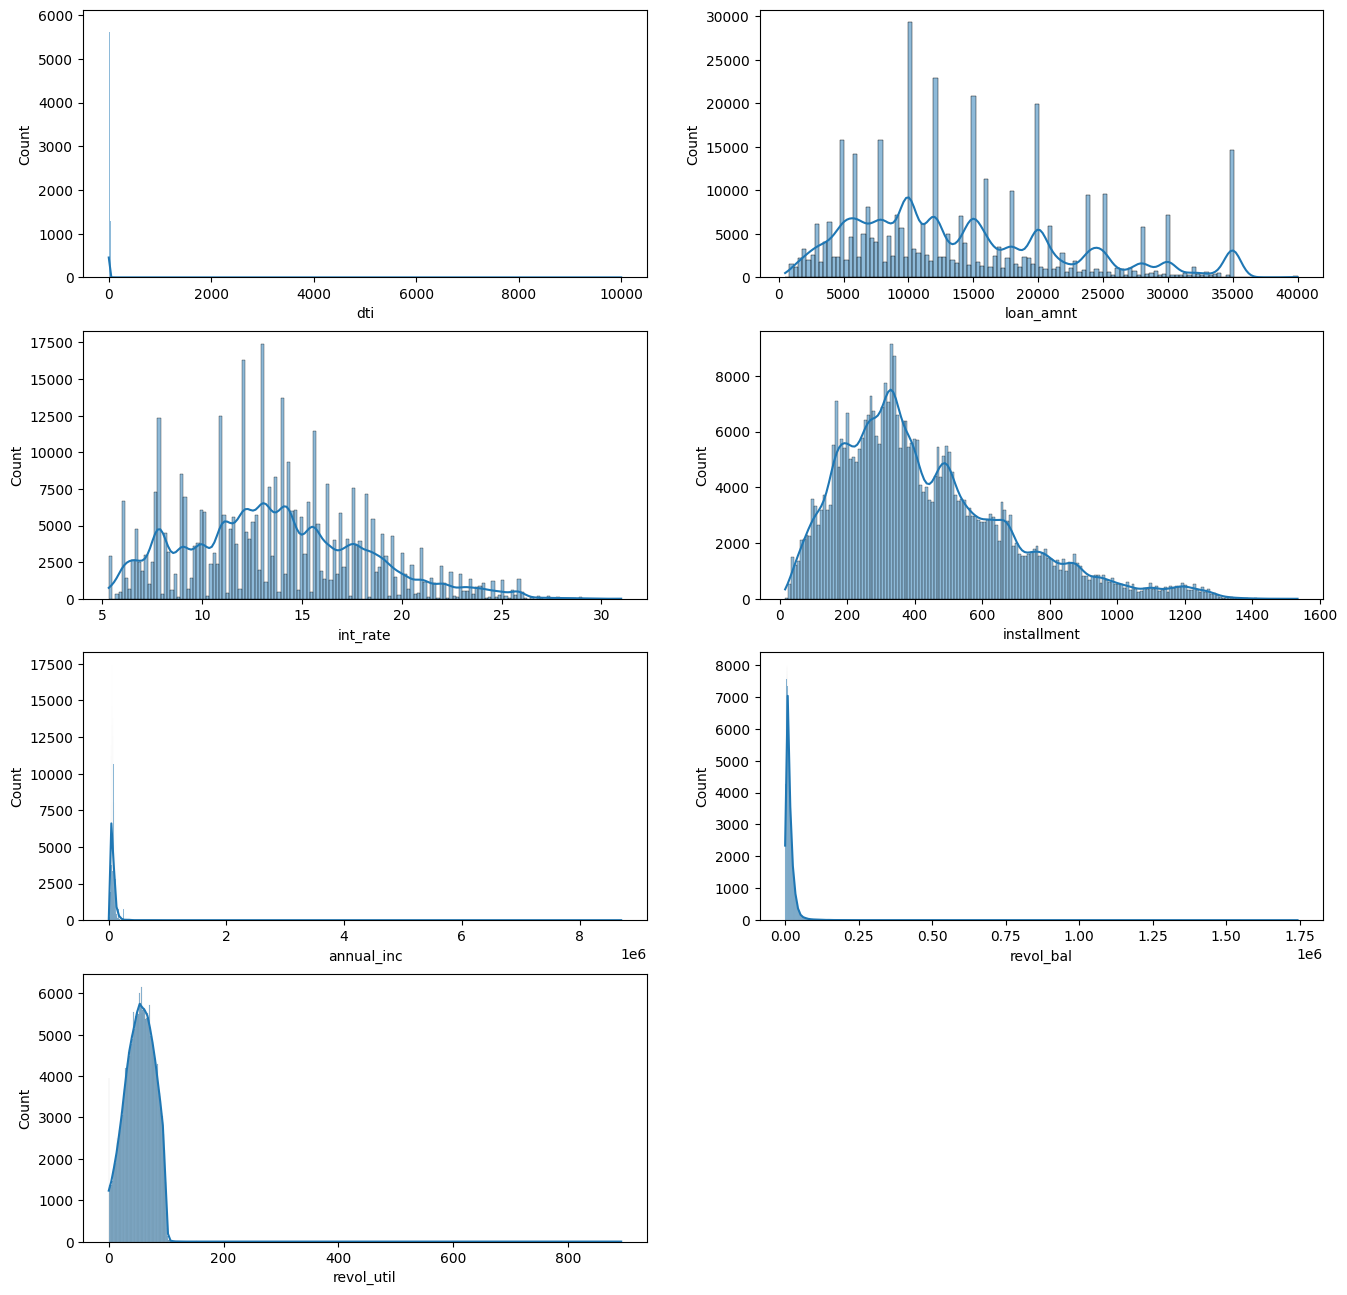

In [ ]:

plt.figure(figsize = (16, 16))
for i, col in enumerate(num_cont):
  plt.subplot(4, 2, i+1)
  sns.histplot(data = df, x = col, kde = True)
plt.show()


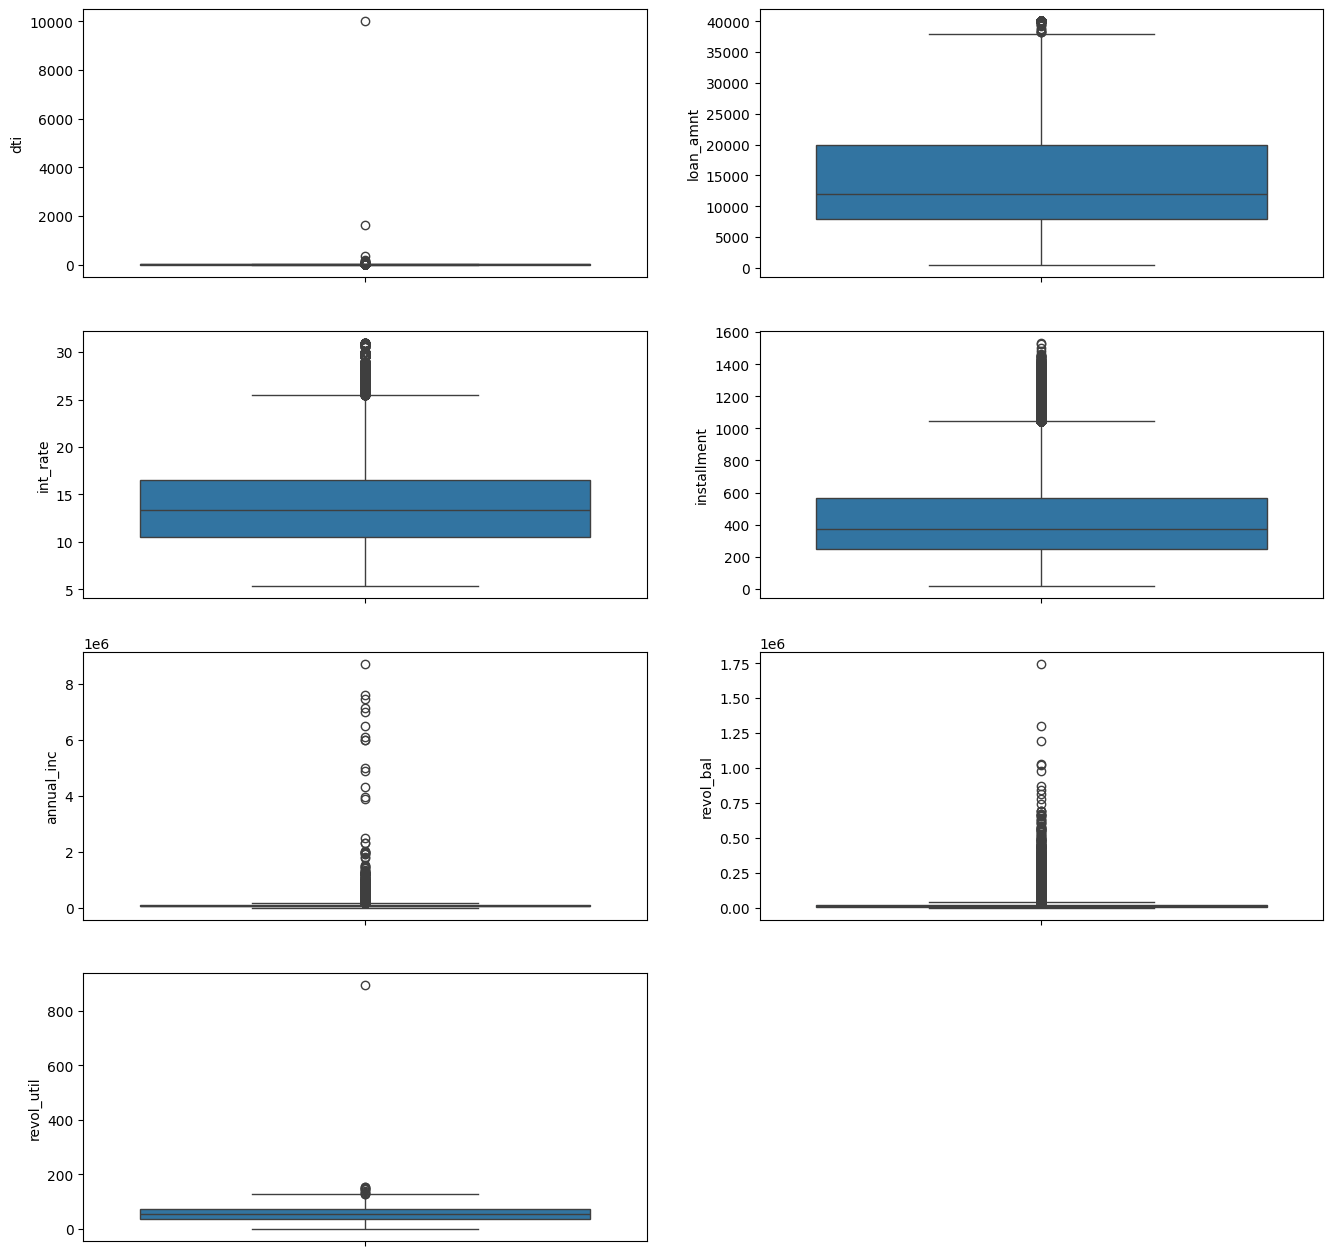

In [ ]:

plt.figure(figsize = (16, 16))
for i, col in enumerate(num_cont):
  plt.subplot(4, 2, i+1)
  sns.boxplot(df[col])
plt.show()



In [ ]:
df['loan_amnt'].kurt()

-0.0625975349858221

In [ ]:
df['int_rate'].kurt()

-0.14394653809142932

In [ ]:
df['dti'].kurt()

237923.67649706747

In [ ]:
df['revol_bal'].kurt()

384.221093093069

In [ ]:
df['dti'].quantile(99.99/ 100)

49.38

In [ ]:
df[df['dti'] > 50].shape

(35, 26)

In [ ]:
df['revol_util'].quantile(99.99/ 100)

114.77941999998875

In [ ]:
df[df['revol_util'] > 114].shape

(45, 26)

In [ ]:
df['revol_bal'].quantile(99.99/ 100)

533522.2366991744

In [ ]:
df[df['revol_bal'] > 533639].shape

(40, 26)

In [ ]:
df['annual_inc'].quantile(99.99/ 100)

1250000.0

In [ ]:
df[df['annual_inc'] > 1250000.0].shape

(37, 26)

**Observations & Actions:**

- The KDE for loan amount (loan_amnt) and interest rate (int_rate) show a multimodal distribution indicating preference for certain values within the range, and negative kurtosis with values spread with less variation.

- The histogram plot for installment shows a right skewed distribution with majority of the data points clustered on the left side of the distribution, with a long tail extending to the right. The distribution appears to be multimodal, with multiple peaks. We will apply log transformation to reduce skewness.

- The distributions for Annual income ('annual_inc'), DTI ('dti'), Revolving balance ('revol_bal'), and Revolving utilization ('revol_util) are extremely right skewed with data clustered in the lower side of the distribution and a long tail indicating extreme values and outliers.

- The boxplots for DTI, Revolving Util, Annual income and Revolving balance show few extreme outliers indicating these might be errors. We further ascertained this by checking for number of data points with values above 99.99 percentile, which turned out to be very few. It's reasonable to assume the records are erroneous and delete them as they are few in number and won't affect the model building process.

**Deleting potentially erroneous records**

In [ ]:
df.shape

(396030, 26)

In [ ]:
df = df[(df['dti'] <= 50) & (df['revol_util'] <= 114) & (df['annual_inc'] <= 1250000) & (df['revol_bal'] <= 533640) ]

In [ ]:
df.shape

(395875, 26)

**Transformed Data Distribution**

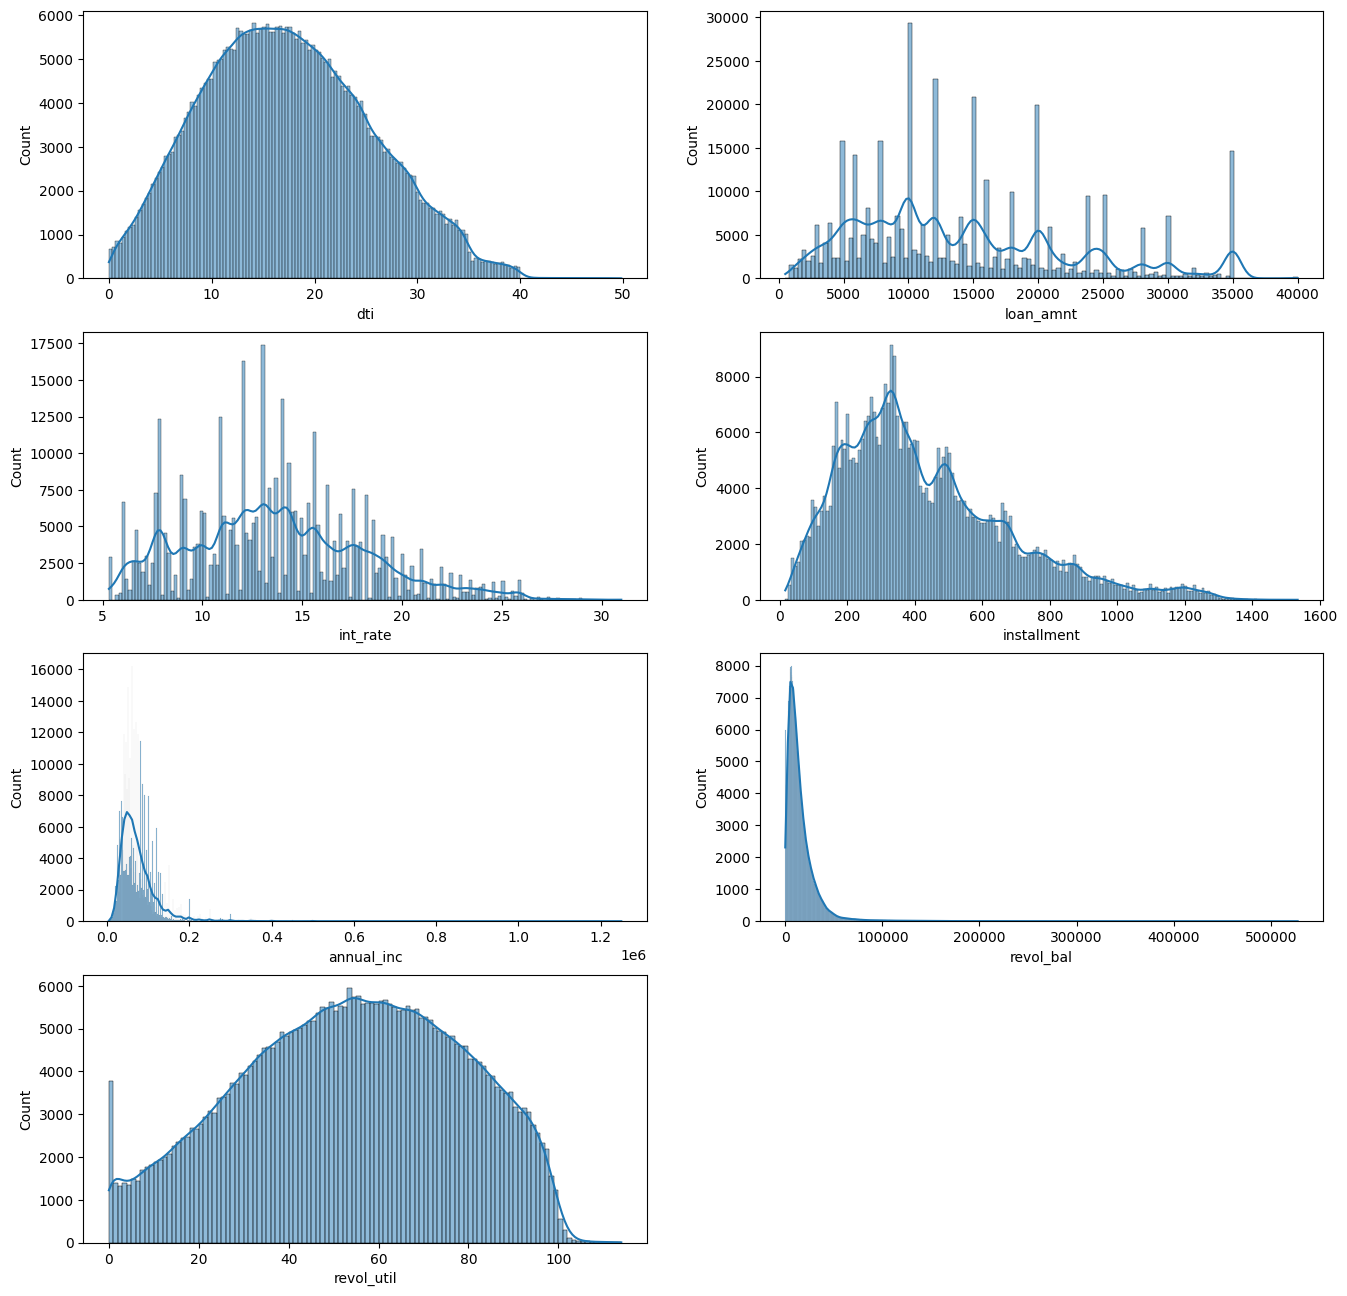

In [ ]:

plt.figure(figsize = (16, 16))
for i, col in enumerate(num_cont):
  plt.subplot(4, 2, i+1)
  sns.histplot(data = df, x = col, kde = True)
plt.show()


In [ ]:
df[df['revol_util'] <= 1]['loan_status'].count()

3959

In [ ]:
df[df['revol_util'] <= 1]['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid     0.863855
Charged Off    0.136145
Name: proportion, dtype: float64

In [ ]:
df[df['revol_util'] <= 10]['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid     0.875911
Charged Off    0.124089
Name: proportion, dtype: float64

In [ ]:
df[df['revol_util'] >= 0 ]['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid     0.803877
Charged Off    0.196123
Name: proportion, dtype: float64

**Note:**

* There's a notable change in the distribution after removing 155 records.
* DTI now shows a near normal distribution
* Revolving Balance Utilization Rate (revol_util) now appears normal with a spike for values from 0 - 1%. Interestingly 86.39% of such borrowers have fully paid loans vs the average 80.39% and 87.59% of those with less than 10% utilization.  
* Annual Income and Revolving balance are still right skewed but to a lesser degree. Log transformation of these features will be considered.

**Log Transformation**

In [ ]:
'''
df['installment'] = np.log(df['installment'])
df['annual_inc'] = np.log(df['annual_inc'])
df['revol_bal'] = np.log(df['revol_bal'])

'''


In [ ]:
'''
plt.figure(figsize = (16, 16))
for i, col in enumerate(num_cont):
  plt.subplot(4, 2, i+1)
  sns.histplot(data = df, x = col, kde = True)
plt.show()
'''

## **Univariate Analysis: Numerical - Discreet Variables**

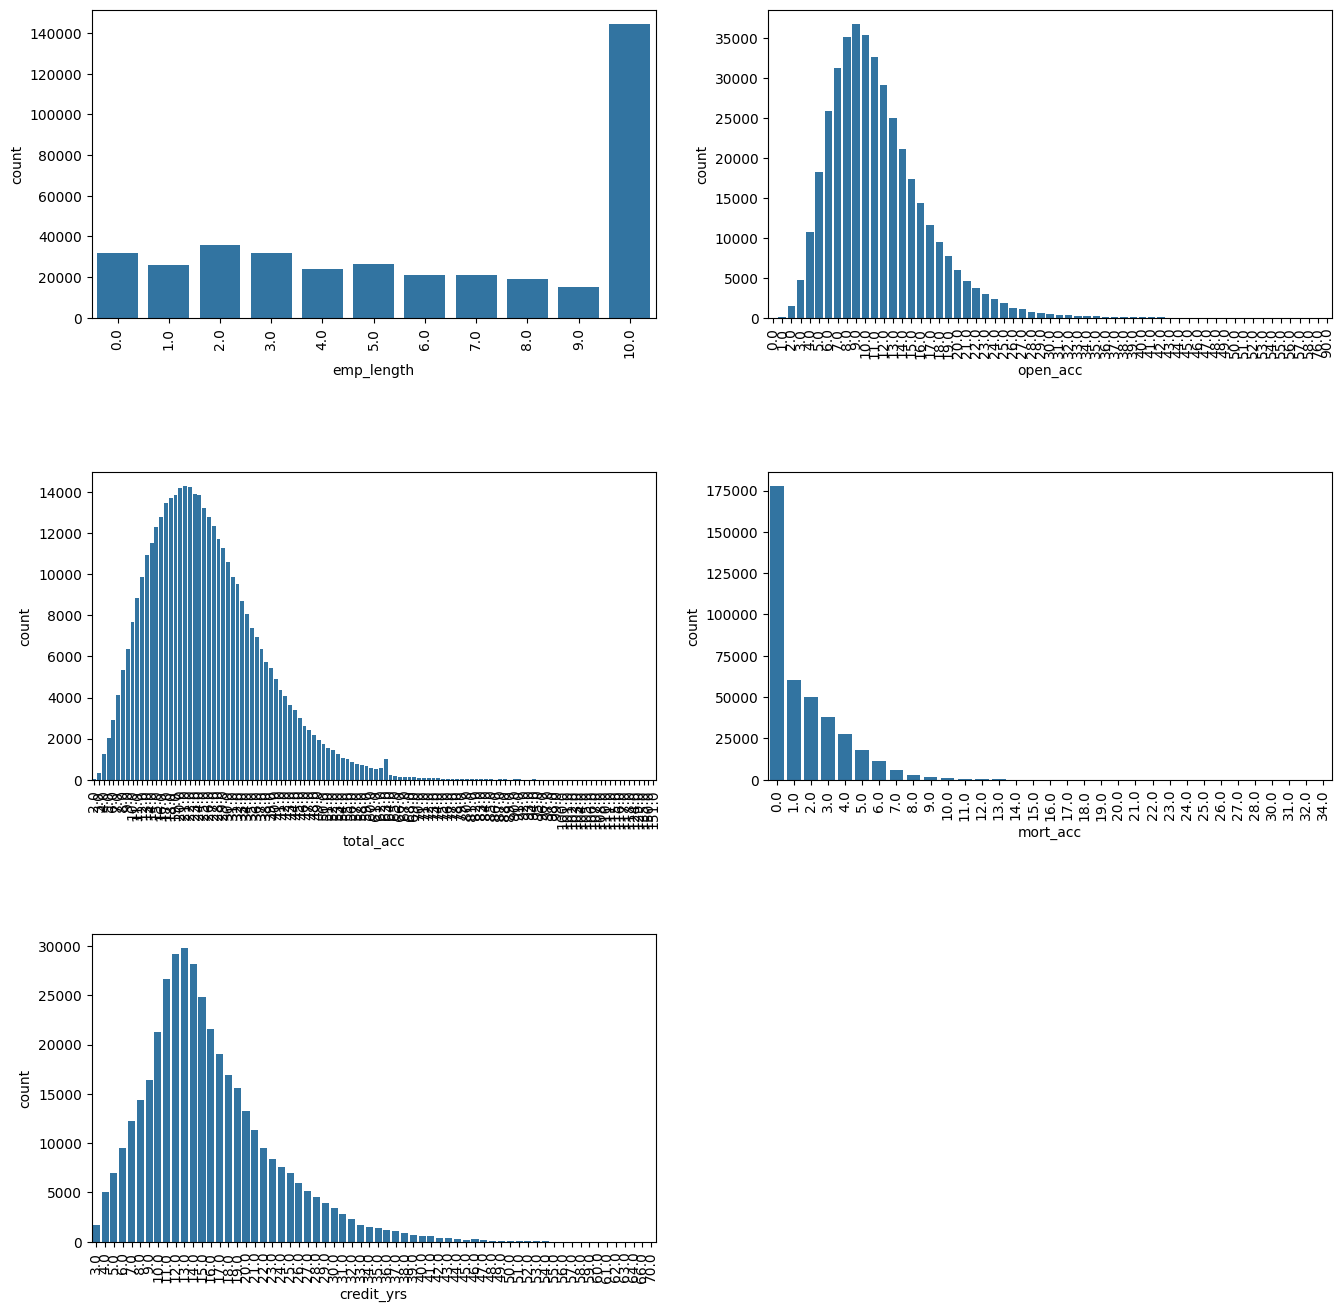

In [ ]:

plt.figure(figsize = (16,16))
for i, col in enumerate(num_disc):
  plt.subplot(3, 2, i+1)
  sns.countplot(data = df, x = col)
  plt.xticks(rotation= 90)
plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
df['loan_status'].value_counts(normalize = True)

loan_status
Fully Paid     0.803877
Charged Off    0.196123
Name: proportion, dtype: float64

**Observations**:

- emp_length i.e. employment duration shows a fairly even distribution across  years from 0 to 9 with a high count in year 10 as the count includes those with 10+ years.

- All other columns i.e. 'open_acc', 'pub_rec','total_acc','mort_acc', 'pub_rec_bankruptcies','credit_yrs', show a higher count for lower values which decreases towards higher values.

- Since these numerical columns show low cardinality we can retain them as they are to retain as much information as possible.


## **Univariate Analysis: Categorical Variables**

In [ ]:
#Categorical columns

cat_cols = list(df.columns[df.dtypes == "category"])
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'zip_codes',
 'state']

In [ ]:
cat_count = ['term', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'grade', 'pub_rec','pub_rec_bankruptcies','application_type' ]

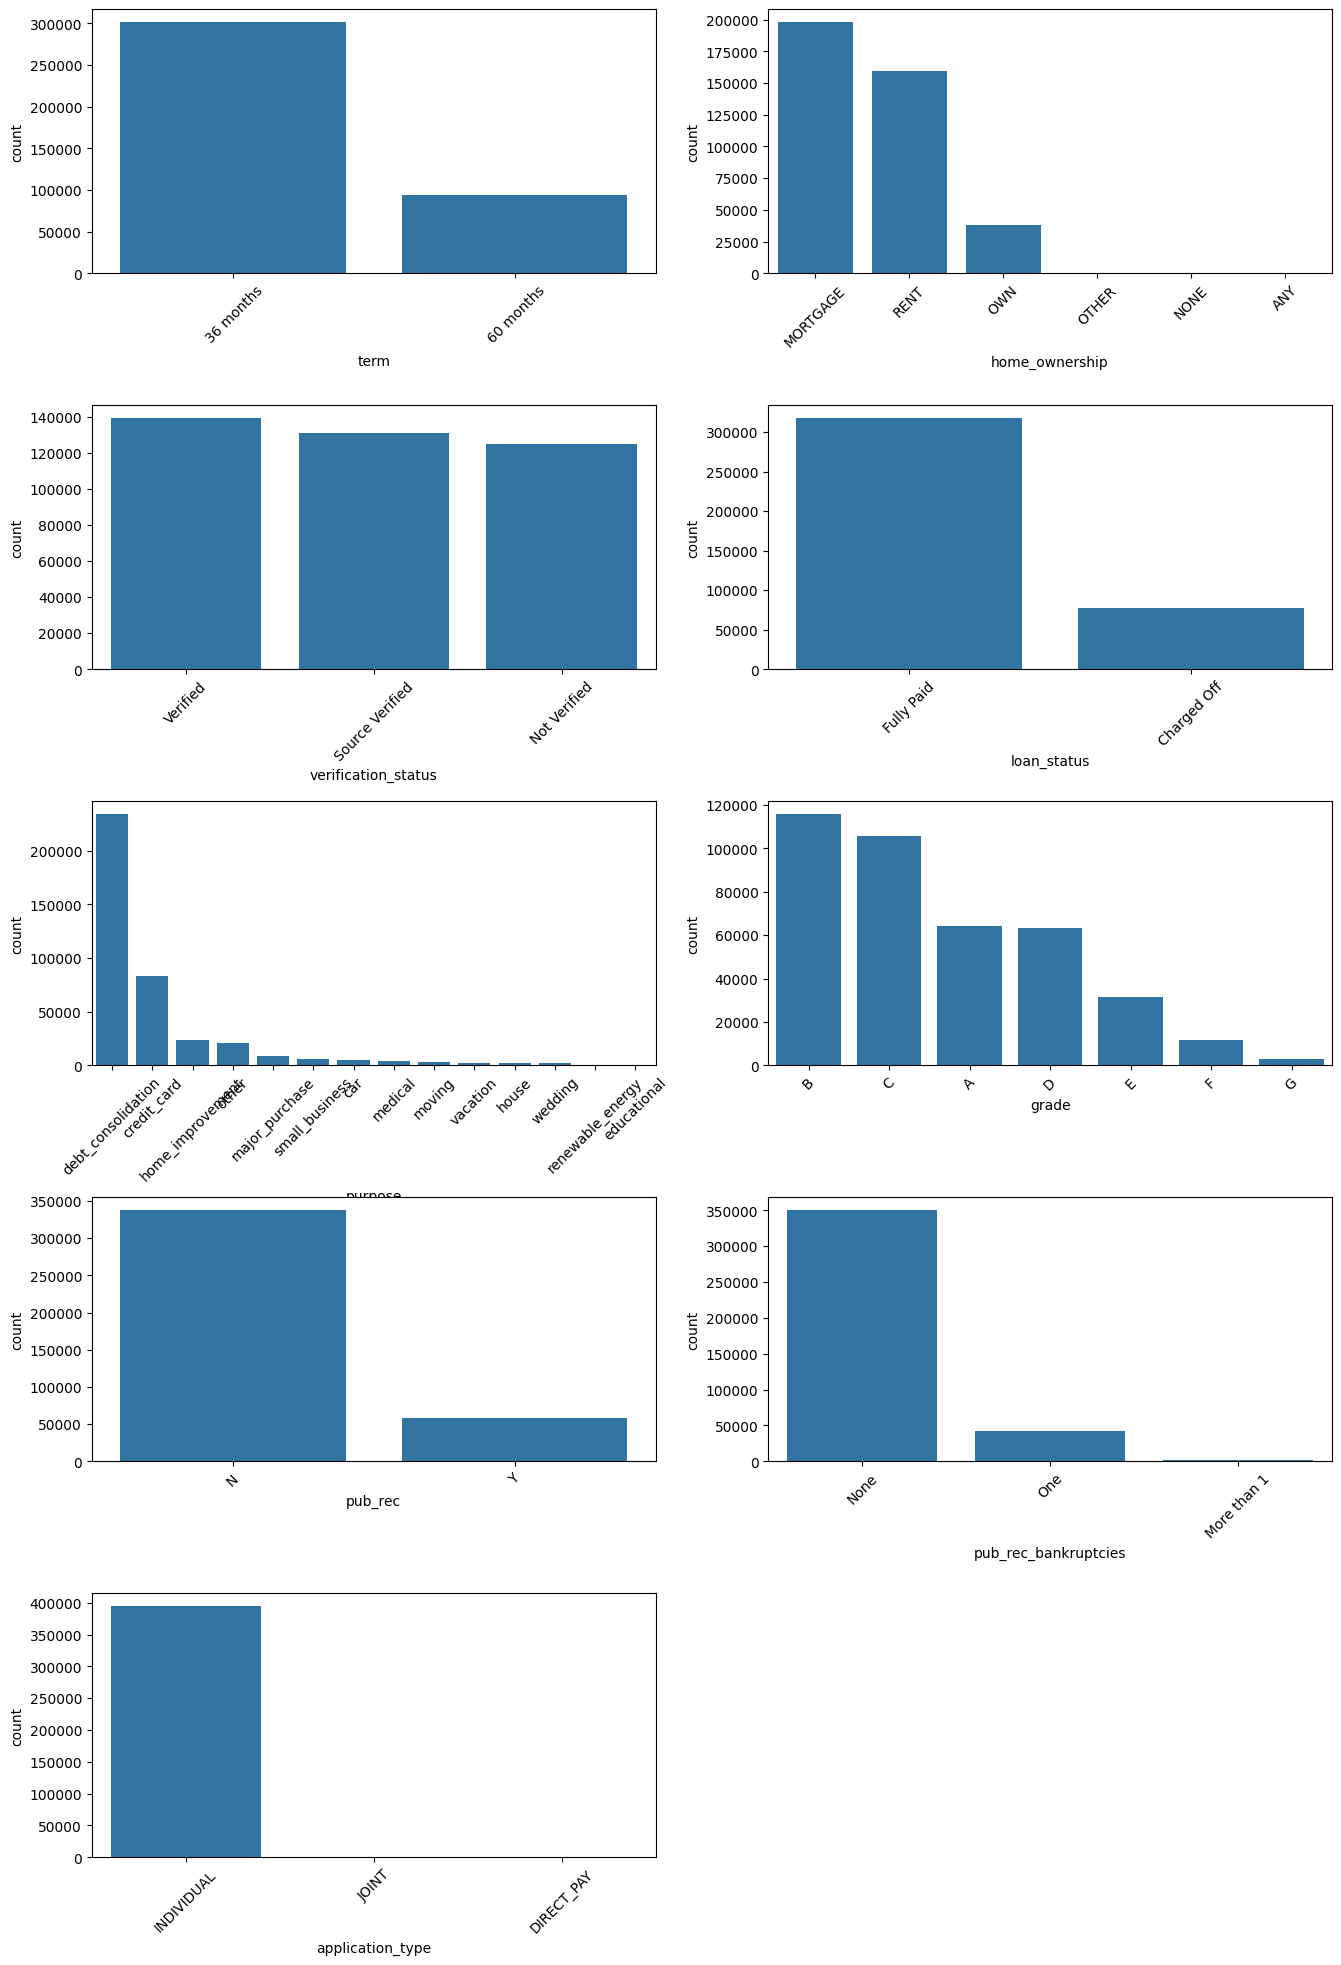

In [ ]:

plt.figure(figsize = (16,24))
for i, col in enumerate(cat_count):
  plt.subplot(5, 2, i+1)
  sort = df[col].value_counts().index
  sns.countplot(data = df, x = col, order=sort)
  plt.xticks(rotation= 45)
plt.subplots_adjust(hspace=0.5)
plt.show()


In [ ]:
df['term'].value_counts(normalize = True)

term
 36 months    0.762589
 60 months    0.237411
Name: proportion, dtype: float64

In [ ]:
df['home_ownership'].value_counts(normalize = True)

home_ownership
MORTGAGE    0.500787
RENT        0.403549
OWN         0.095295
OTHER       0.000283
NONE        0.000078
ANY         0.000008
Name: proportion, dtype: float64

In [ ]:
df['zip_codes'].value_counts()

zip_codes
AP 70466    2167
AE 22690    2108
AP 22690    2090
AE 48052    2025
AE 30723    2017
            ... 
NH 86630     167
NC 93700     167
NM 11650     166
UT 86630     163
ND 93700     158
Name: count, Length: 540, dtype: int64

# **Observations:**

- loan_status :
 * 80% of borrowers repayed their loan in full whereas 20% of loans were charged off. The loan status column is the target variable and this shows imbalance in the data. The data will be balanced using SMOTE.
 * Approximately 80% of borrowers repaid their loans fully while 20% loans were charged off.
- 76% of the borrowers chose the 36 months term vs 24% of borrowers chose term as 60 months.
-  50% of borrowers have a home mortgage. 9% own their homes whereas 40% of borrowers live in rented accomodations.
- Debt consolidation, credit card payment and home improvement are top 3 reasons for borrowings, followed by major purchases and small business loans.

## **Bi-variate Analysis**

We will use Bi-variate analysis to understand the relationship between important independent variables and the target variable i.e. loan status. This will give us insights on which independent variables influence loan_status.

**Imp:** It's important to note here that borrowers whose loan status shows Fully Paid and hence considered credit worthy are tagged as 1. Borrowers whose loan status loan status is 'Charged Off' and  hence considered not credit worthy are tagged as 0.


### **Bi-variate Analysis : Numerical Data**

In [ ]:
# selecting important numerical variables
num_imp = ['loan_amnt', 'int_rate','installment', 'annual_inc', 'dti','revol_util', 'emp_length', \
           'open_acc', 'total_acc','mort_acc', 'credit_yrs']



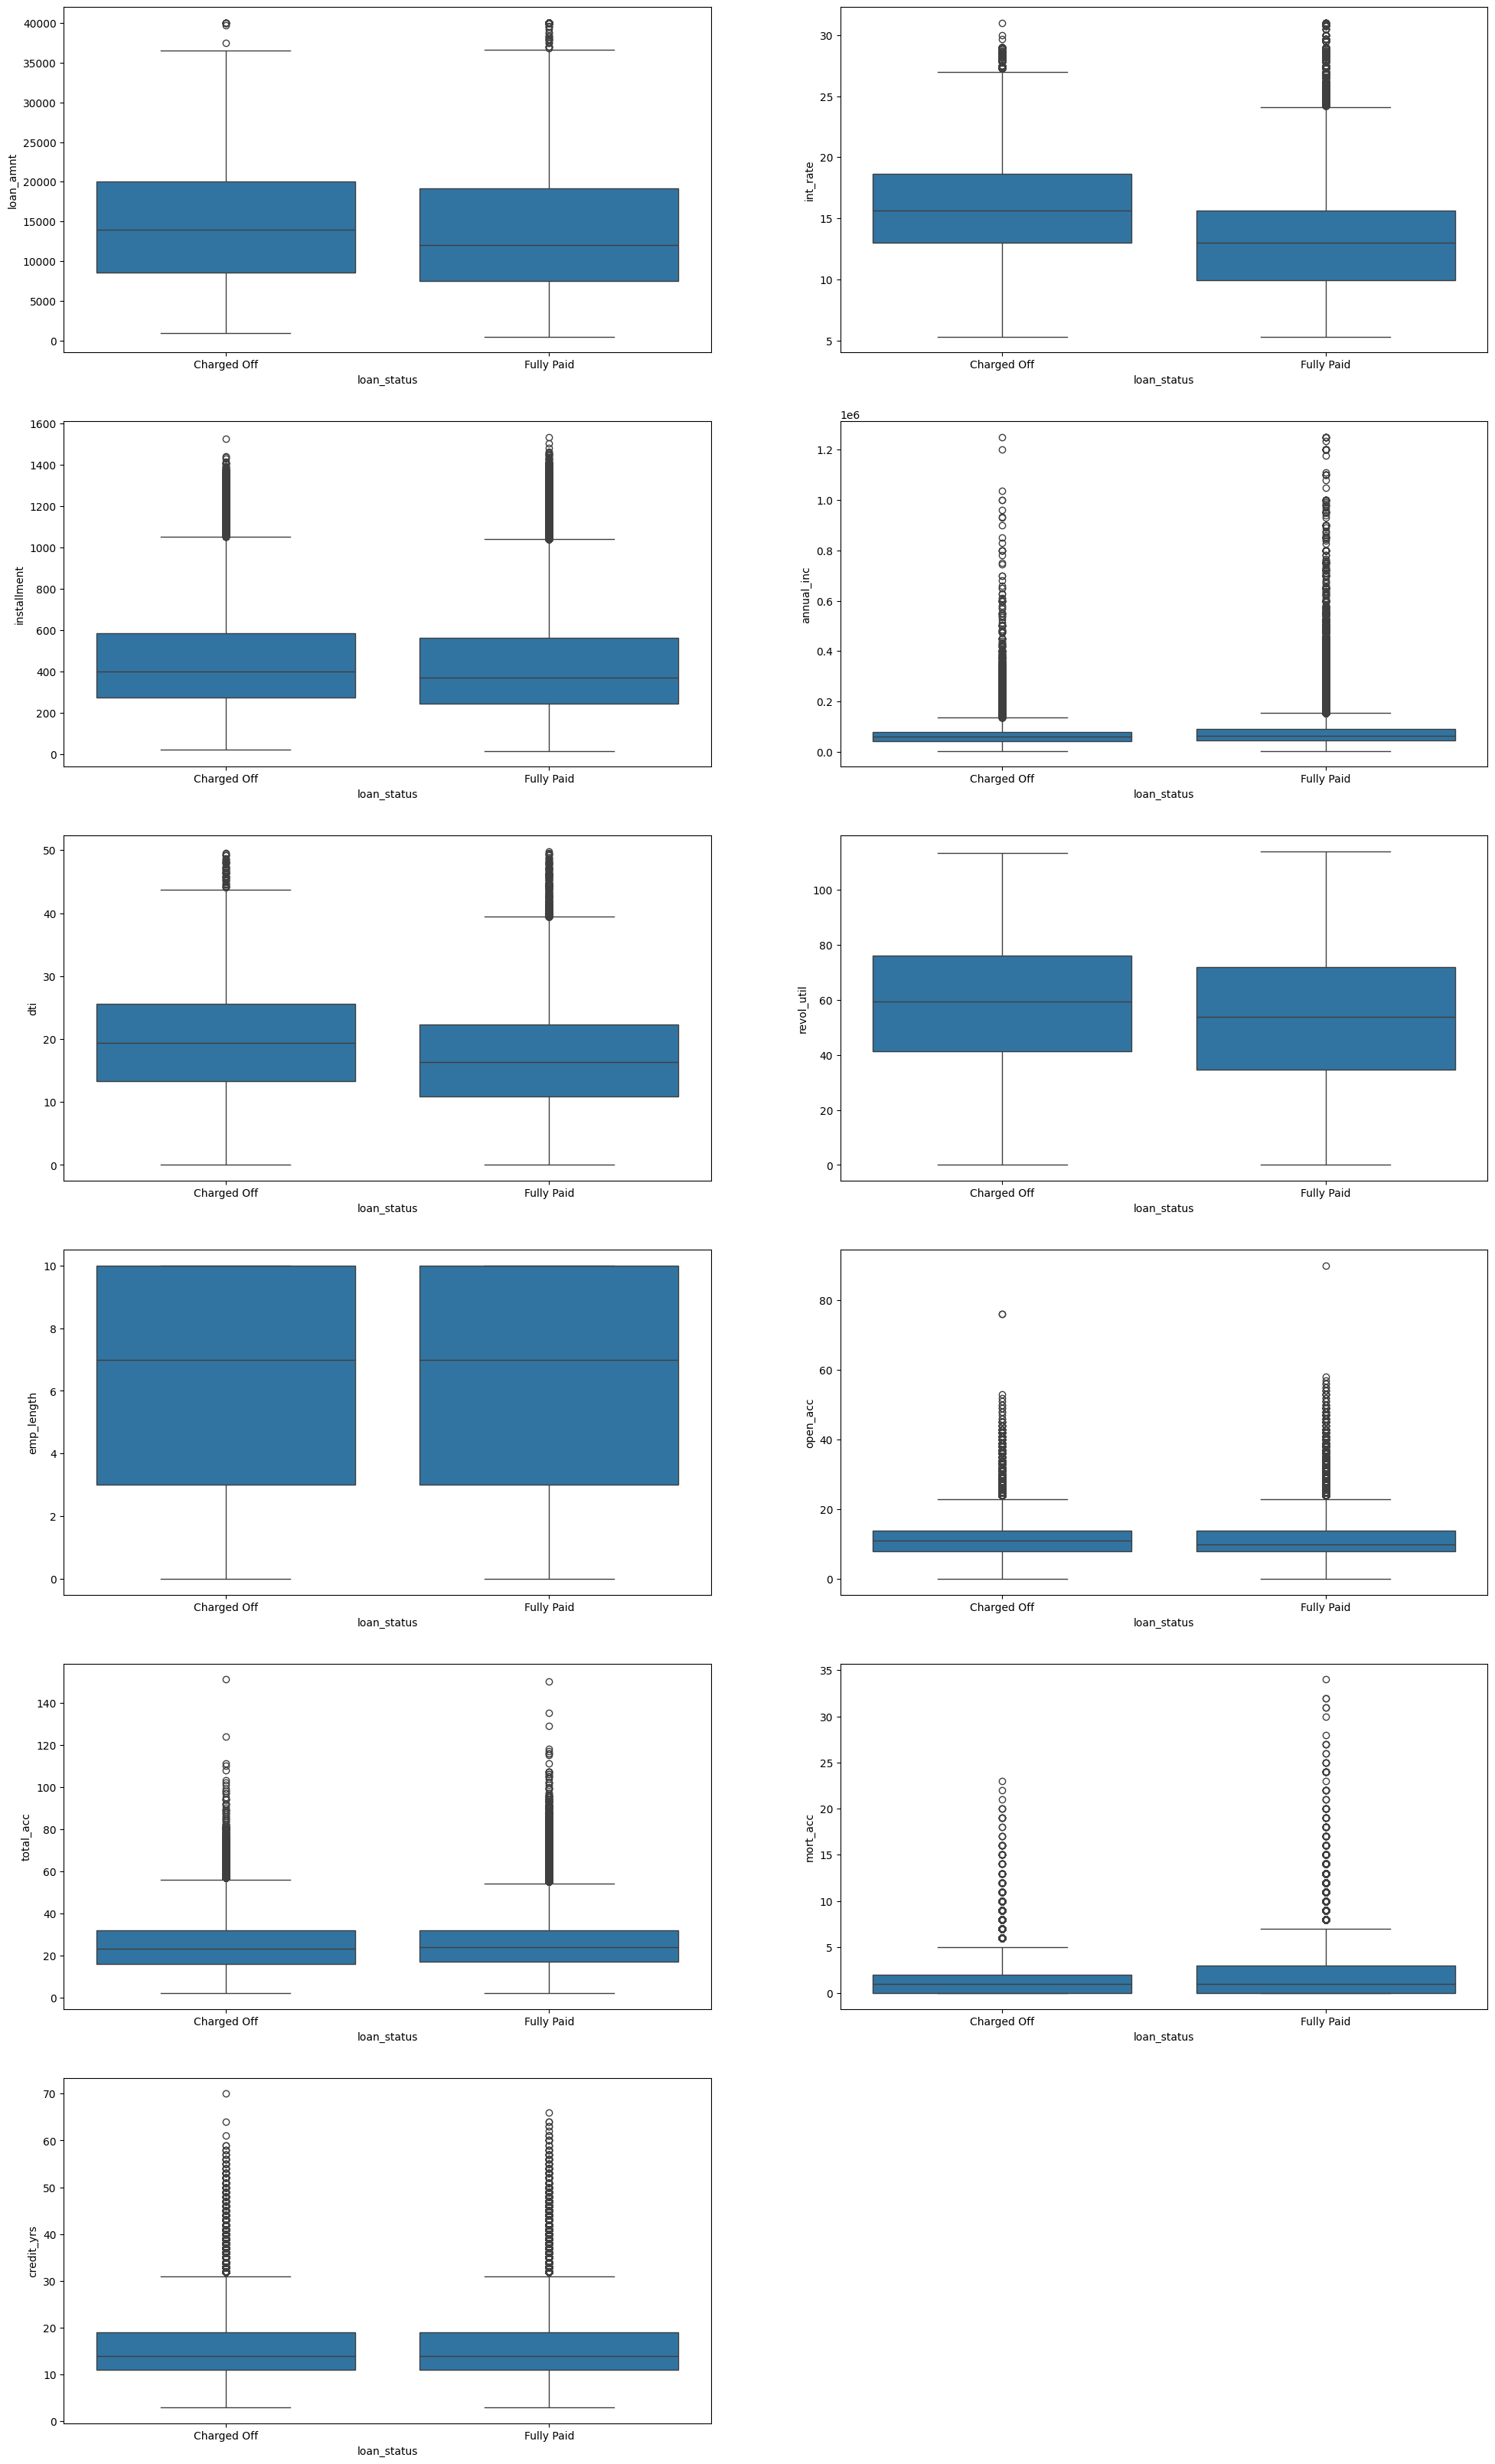

In [ ]:

plt.figure(figsize = (24,48))
for i, col in enumerate(num_imp):
  plt.subplot(7, 2, i+1)
  sns.boxplot(x ='loan_status', y = col, data = df)
plt.show()


**Observations:**

* **Interest Rate is a factor**:
  * There is a visible difference in interest rates between both groups. The median interest rate is higher for borrowers whose loans are 'Charged Off', indicating that higher interest rates are associated with a higher chance of loan default.
  * The spread is wider in the 'Charged Off' group, suggesting more variability in interest rates for borrowers who default.


* **Few features that may have moderate influence on Loan Recovery** :
  * Open Accounts (open_acc), DTI (dti) and Revolving Balance Utilisation (revol_util) show small differences between the groups with median and range of 'Fully Paid' borrowers being marginally lower than that of 'Charged Off' borrowers.
  * The spread and median of annual income and mortgage account of 'Fully Paid' borrowers is slightly above that of loan defaulters. These factors may not be strongly related to loan_status but may have some influence.

* **Unlikely factors** :
  * Distribution of features like loan amount, employment length, pub_rec_bankruptcies', total_account, credit_years, and revolving utilization do not show clear distinction between the groups and may not influence loan_status on their own.


In [ ]:
num_corr = ['loan_amnt', 'int_rate','installment', 'annual_inc', 'dti','revol_util', 'emp_length', \
           'open_acc','total_acc','mort_acc','credit_yrs' ]

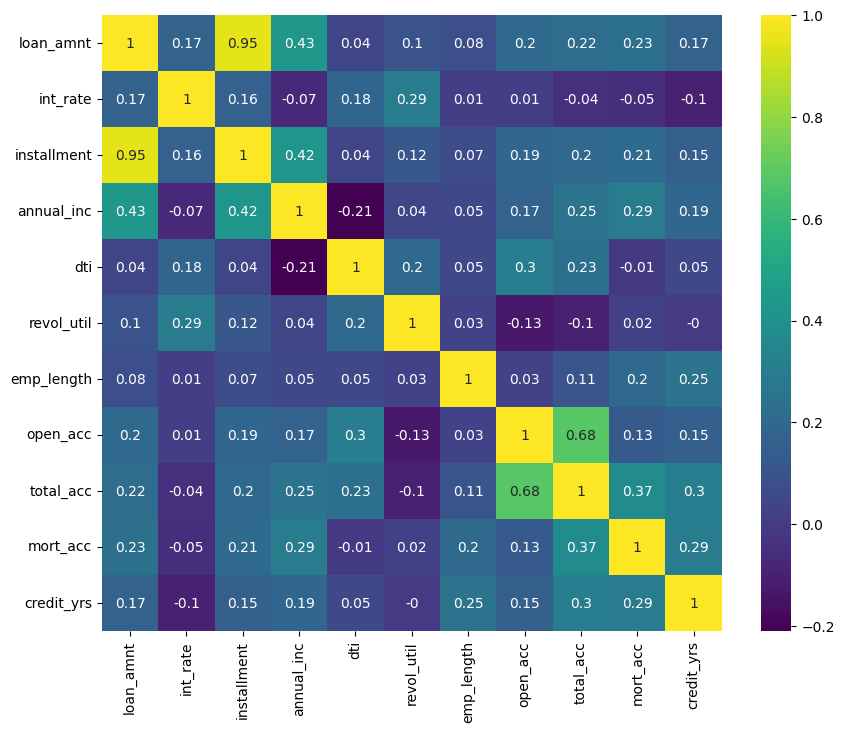

In [ ]:
plt.figure(figsize = (10,8))
sns.heatmap(round(df[num_corr].corr(),2), cmap= "viridis", annot=True)
plt.show()

**Observations:**

* **Correlations**:
  * There's a very strong positive correlation between installment and loan_amount since the installment is a derivative of loan amount. Multicollinearity between them is expected.
  * There a high postive correlation between open account and total_account since both are counts of credit lines and total_account would include open accounts.
  * As expected, there's a moderate positive correlation between annual_income and loan_amount and installment indicating individuals with higher income would get bigger loans and pay higher installments.
  * There is weak correlation between other features.

### **Bi-variate Analysis : Categorical Data**

In [ ]:
cat_cols

['term',
 'grade',
 'sub_grade',
 'emp_title',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'pub_rec',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'zip_codes',
 'state']

In [ ]:
cat_imp = ['term', 'grade', 'sub_grade','home_ownership', 'verification_status','initial_list_status' , 'purpose', 'application_type', 'pub_rec','pub_rec_bankruptcies' ]

In [ ]:
df["term"].value_counts()

term
 36 months    301890
 60 months     93985
Name: count, dtype: int64

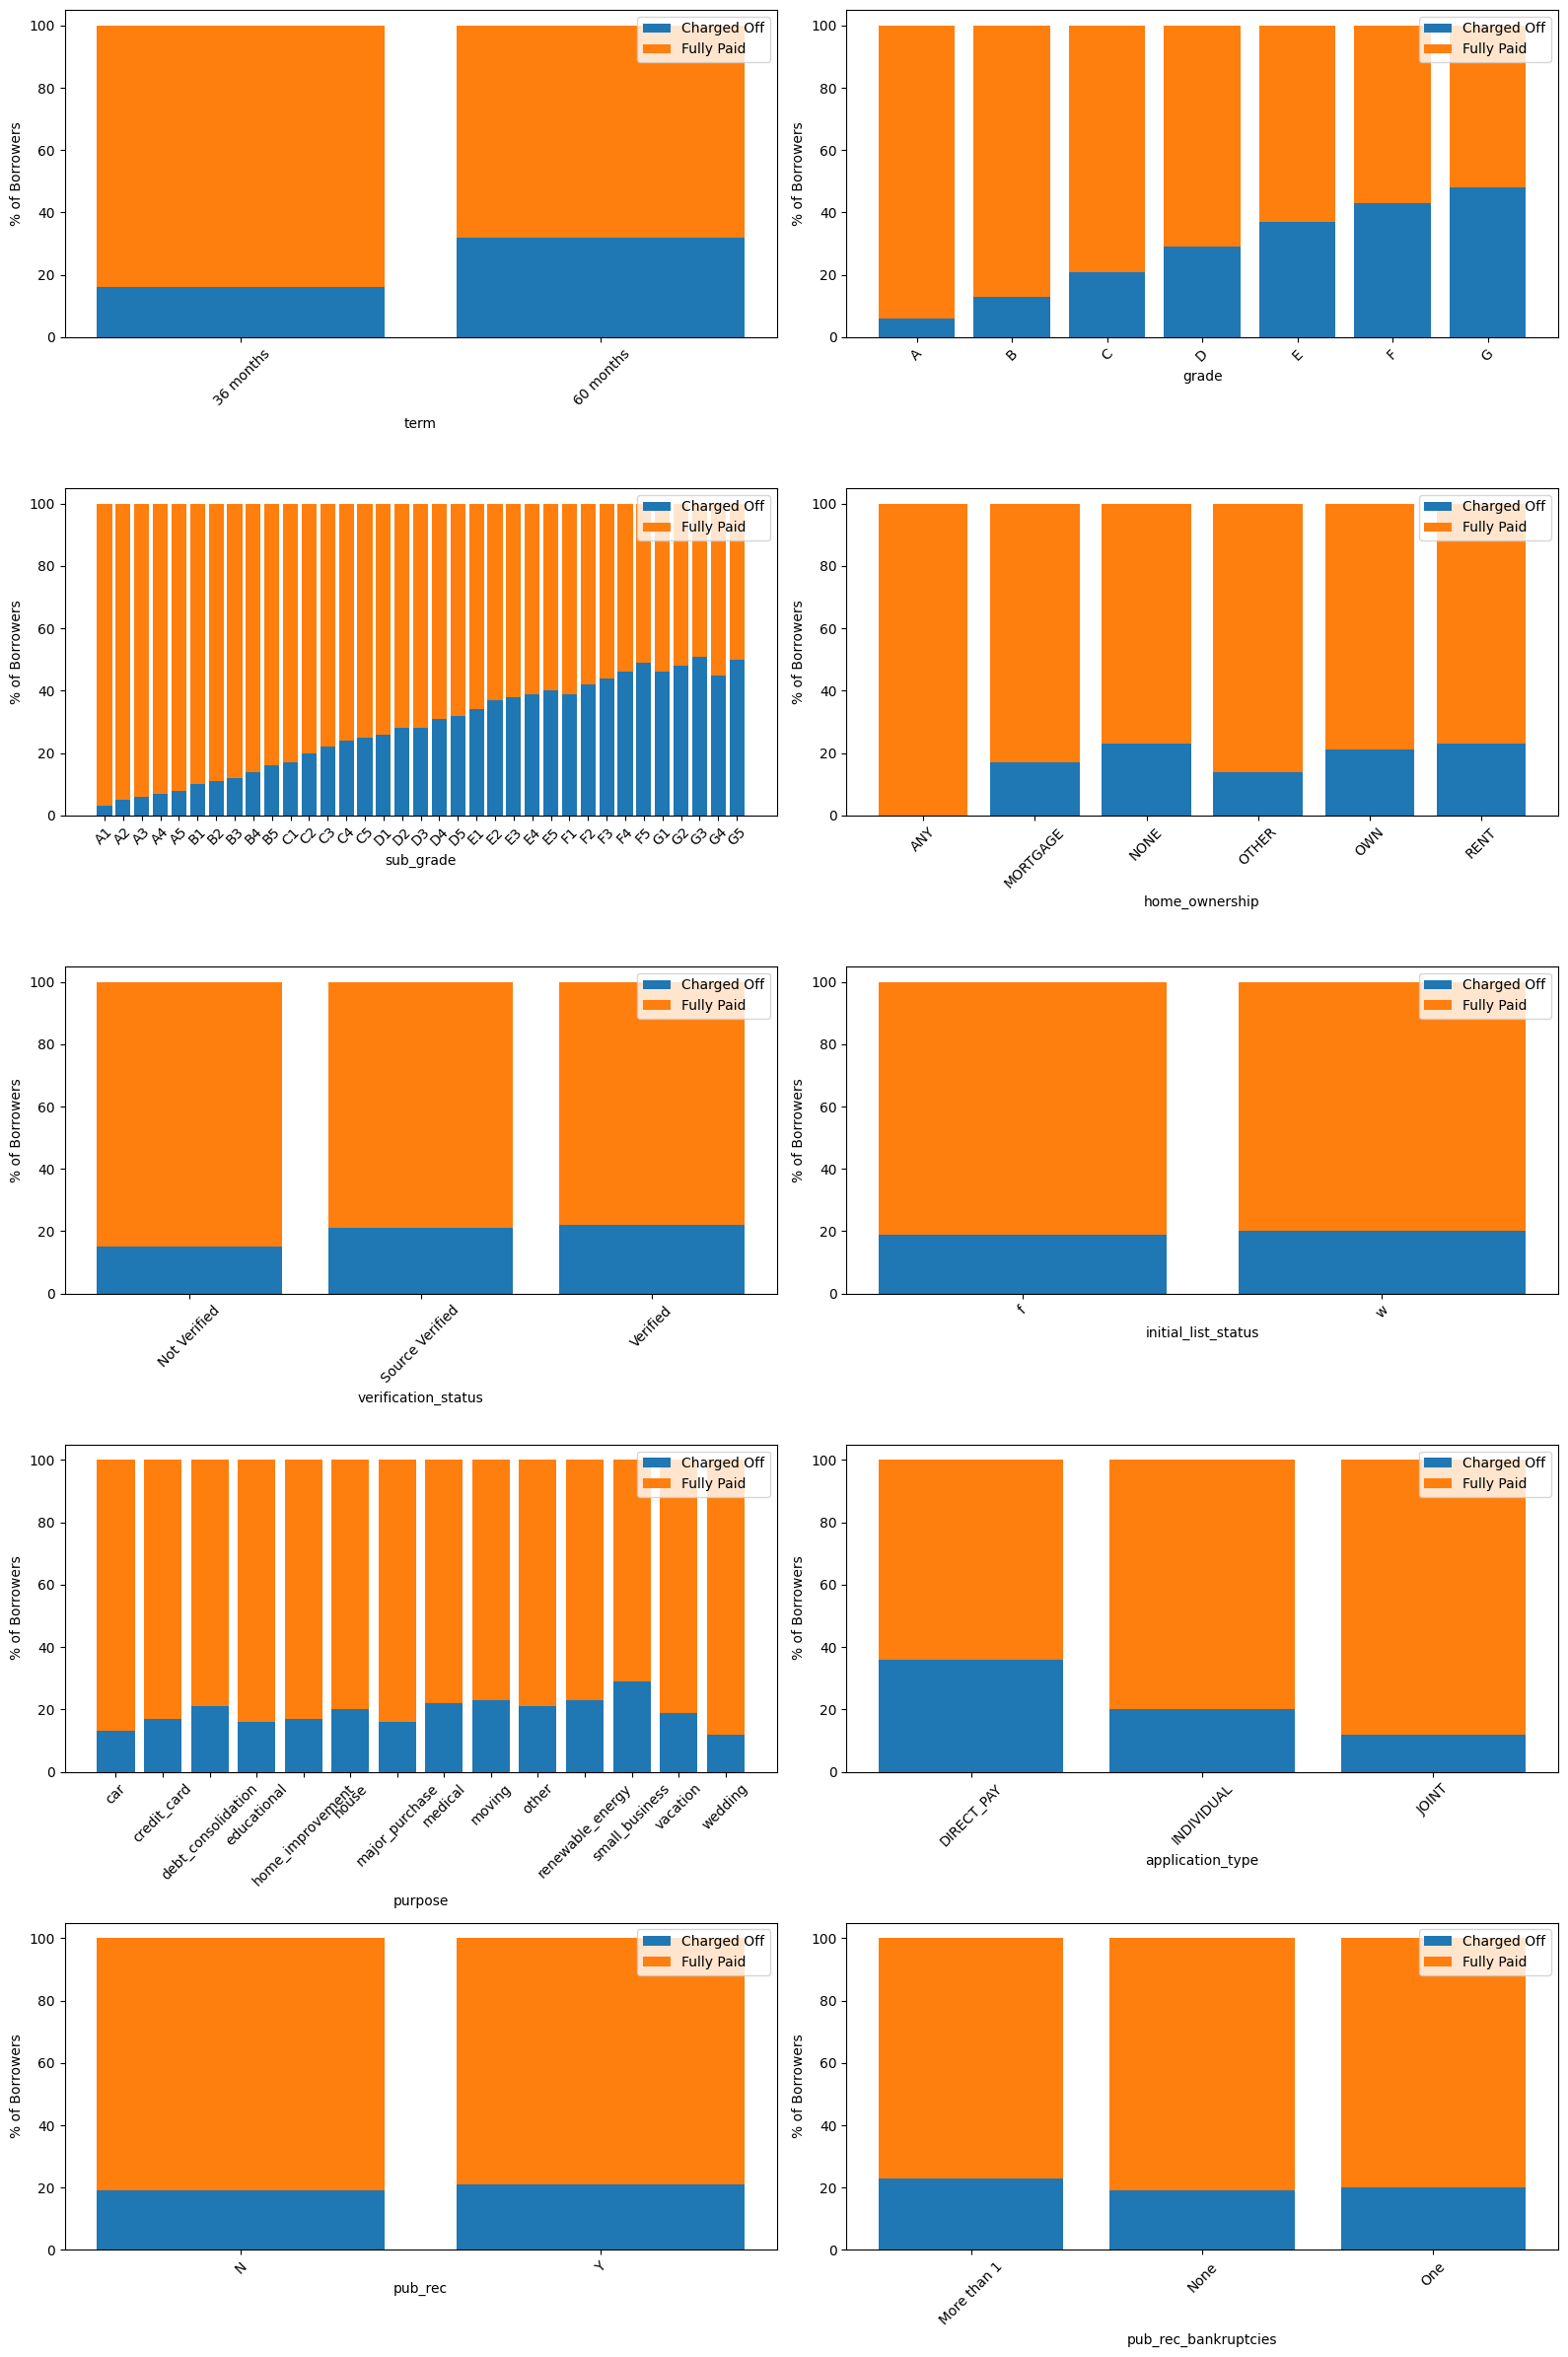

In [ ]:
plt.figure(figsize=(16,24))
for i, col in enumerate(cat_imp):
  ax=plt.subplot(5,2,i+1)

  data = df.pivot_table(index=col, columns='loan_status', aggfunc='count', values='state')
  data = data.div(data.sum(axis=1), axis=0).multiply(100).round()
  data.reset_index(inplace=True)

  plt.bar(data[col],data['Charged Off'])
  plt.bar(data[col],data['Fully Paid'], bottom = data['Charged Off'])
  plt.xlabel(f'{col}')
  plt.xticks(rotation= 45)
  plt.ylabel('% of Borrowers')
  plt.legend(['Charged Off','Fully Paid'])

plt.tight_layout()
plt.show()

In [ ]:
df.groupby('term')['loan_status'].value_counts(normalize = True)

term        loan_status
 36 months  Fully Paid     0.842264
            Charged Off    0.157736
 60 months  Fully Paid     0.680577
            Charged Off    0.319423
Name: proportion, dtype: float64

In [ ]:
df.groupby('home_ownership')['loan_status'].value_counts(normalize = True)

home_ownership  loan_status
ANY             Fully Paid     1.000000
                Charged Off    0.000000
MORTGAGE        Fully Paid     0.830441
                Charged Off    0.169559
NONE            Fully Paid     0.774194
                Charged Off    0.225806
OTHER           Fully Paid     0.857143
                Charged Off    0.142857
OWN             Fully Paid     0.793294
                Charged Off    0.206706
RENT            Fully Paid     0.773378
                Charged Off    0.226622
Name: proportion, dtype: float64

In [ ]:
df.groupby('purpose')['loan_status'].value_counts(normalize = True).sort_values(ascending = False)

purpose             loan_status
wedding             Fully Paid     0.879139
car                 Fully Paid     0.865176
educational         Fully Paid     0.836576
major_purchase      Fully Paid     0.835230
credit_card         Fully Paid     0.832946
home_improvement    Fully Paid     0.829904
vacation            Fully Paid     0.810690
house               Fully Paid     0.802817
debt_consolidation  Fully Paid     0.792585
other               Fully Paid     0.787769
medical             Fully Paid     0.782888
renewable_energy    Fully Paid     0.765957
moving              Fully Paid     0.765159
small_business      Fully Paid     0.705614
                    Charged Off    0.294386
moving              Charged Off    0.234841
renewable_energy    Charged Off    0.234043
medical             Charged Off    0.217112
other               Charged Off    0.212231
debt_consolidation  Charged Off    0.207415
house               Charged Off    0.197183
vacation            Charged Off    0.189310
home_improvement    Charged Off    0.170096
credit_card         Charged Off    0.167054
major_purchase      Charged Off    0.164770
educational         Charged Off    0.163424
car                 Charged Off    0.134824
wedding             Charged Off    0.120861
Name: proportion, dtype: float64

In [ ]:
df.groupby('grade')['loan_status'].value_counts(normalize = True)

grade  loan_status
A      Fully Paid     0.937134
       Charged Off    0.062866
B      Fully Paid     0.874274
       Charged Off    0.125726
C      Fully Paid     0.788195
       Charged Off    0.211805
D      Fully Paid     0.711323
       Charged Off    0.288677
E      Fully Paid     0.626370
       Charged Off    0.373630
F      Fully Paid     0.572060
       Charged Off    0.427940
G      Fully Paid     0.521298
       Charged Off    0.478702
Name: proportion, dtype: float64

**Observations:**

* **Loan Term and Default**: Borrowers with 60-month loans have a significantly higher default rate (~32%) compared to those with 36-month loans (16%).

* **Home Ownership**: Borrowers with mortgages have the highest loan recovery rate (83%), while renters have the lowest (77%).

* **Loan Purpose**: Loans for weddings, cars, education, and major purchases have higher recovery rates than those for small businesses, moving, and renewable energy.  

* **Grade**: The loan recovery percentage decreases significantly from Grade A to Grade G, making it a clear marker of loan quality. This strongly indicates the likelihood of borrowers repaying or defaulting on their loans.


## **Location-Based Analysis**

In [ ]:
df['state'].nunique()

54

In [ ]:
df['zip_codes'].nunique()

540

In [ ]:
df_fully_paid = df[df['loan_status'] == 'Fully Paid']

In [ ]:
# Top 3 states with best recovery %

df.groupby('state')['loan_status'].value_counts(normalize=True).reset_index().query('loan_status == "Fully Paid"').sort_values('proportion', ascending=False).iloc[0:3]

state loan_status  proportion
52    MN  Fully Paid    0.818959
74    NY  Fully Paid    0.813598
80    OR  Fully Paid    0.810297

In [ ]:
# Bottom 3 states with worst recovery %

df.groupby('state')['loan_status'].value_counts(normalize=True).reset_index().query('loan_status == "Fully Paid"').sort_values('proportion', ascending=False).iloc[51:54]

state loan_status  proportion
82     PA  Fully Paid    0.797361
104    WV  Fully Paid    0.796110
106    WY  Fully Paid    0.791979

In [ ]:
# Zip codes with highest recovery %

df.groupby('zip_codes')['loan_status'].value_counts(normalize=True).reset_index().query('loan_status == "Fully Paid"').sort_values('proportion', ascending=False).iloc[0:10]

zip_codes loan_status  proportion
0    AA 00813  Fully Paid         1.0
562  MS 05113  Fully Paid         1.0
480  ME 00813  Fully Paid         1.0
482  ME 05113  Fully Paid         1.0
488  ME 29597  Fully Paid         1.0
500  MI 00813  Fully Paid         1.0
502  MI 05113  Fully Paid         1.0
508  MI 29597  Fully Paid         1.0
520  MN 00813  Fully Paid         1.0
522  MN 05113  Fully Paid         1.0

In [ ]:
# Zip codes with poorest recovery %

df.groupby('zip_codes')['loan_status'].value_counts(normalize=True).reset_index().query('loan_status == "Fully Paid"').sort_values('proportion', ascending=False).iloc[537:]

zip_codes loan_status  proportion
679   NH 93700  Fully Paid         0.0
685   NJ 11650  Fully Paid         0.0
1079  WY 93700  Fully Paid         0.0

**Observation:**

* Amongst States Minnesota (MN), New York (NY) and Oregon (OR) had the best recover rates whereas recovery rates were worst in Pennsylvania (PA), West Virginia (WV) ans Wyoming(WY). However, the recovery rates for top and bottom states by ~3% so States may not be a strong factor.

* Some zip codes show a 100% recovery rate, while others have a 100% default rate, suggesting that zip code may be a significant determinant of loan outcomes.


## **Multi-variate Analysis**

In [ ]:
num_cont

['dti',
 'loan_amnt',
 'int_rate',
 'installment',
 'annual_inc',
 'revol_bal',
 'revol_util']

<Axes: xlabel='int_rate', ylabel='annual_inc'>

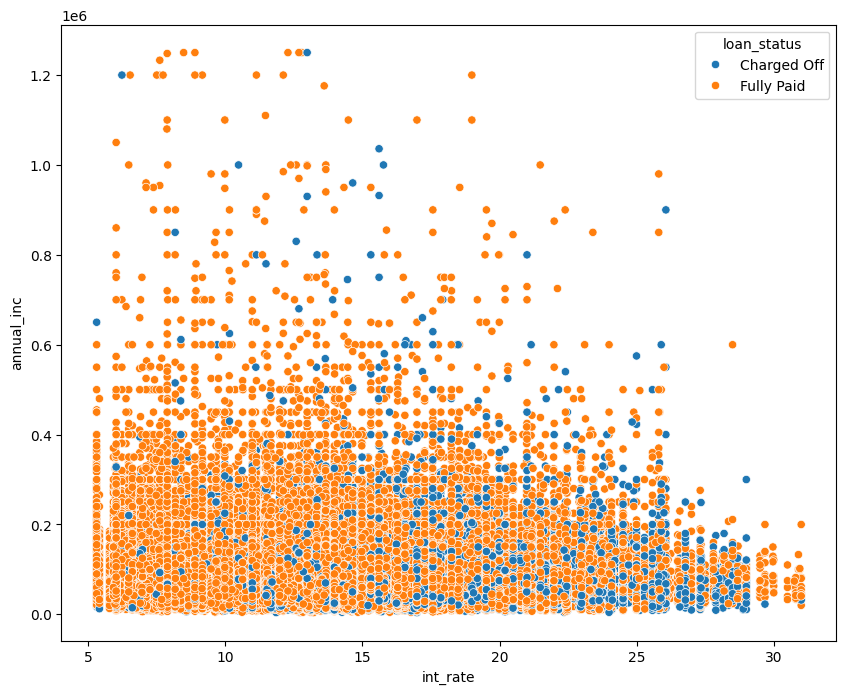

In [ ]:

plt.figure(figsize = (10,8))
sns.scatterplot(x='int_rate', y='annual_inc', hue='loan_status', data=df)

<Axes: xlabel='int_rate', ylabel='loan_amnt'>

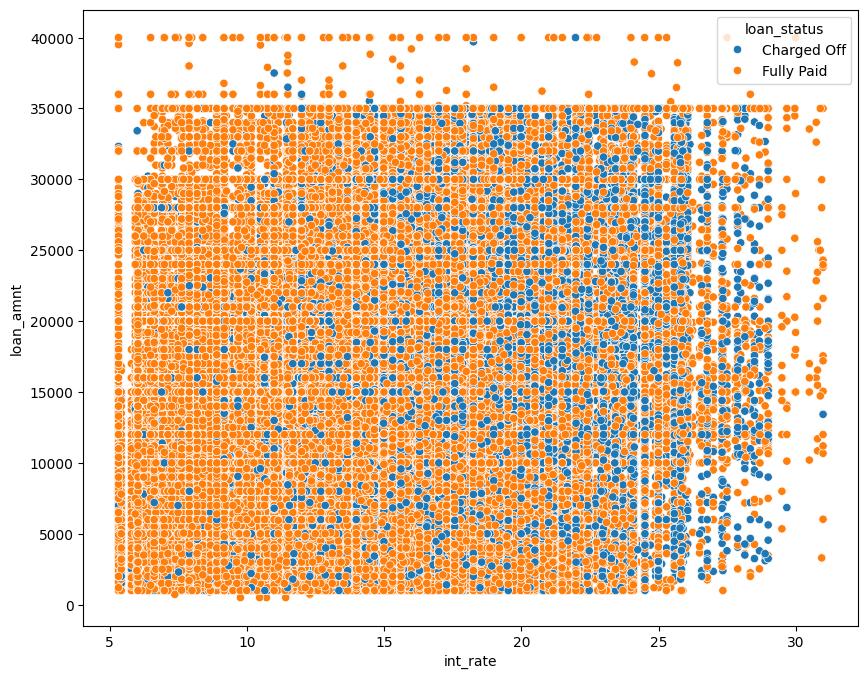

In [ ]:
 plt.figure(figsize = (10,8))
sns.scatterplot(x='int_rate', y='loan_amnt', hue='loan_status', data=df)

<Axes: xlabel='dti', ylabel='annual_inc'>

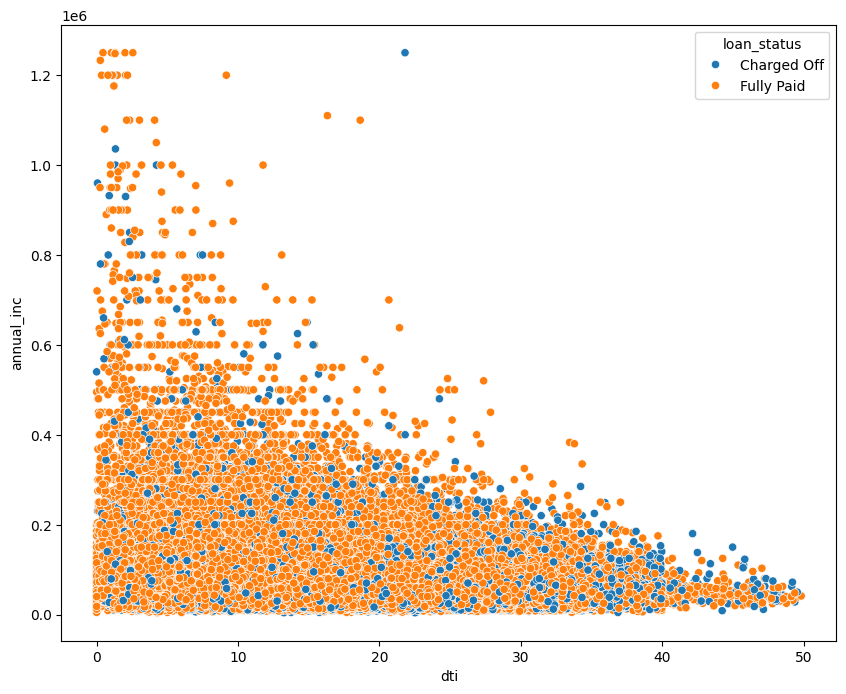

In [ ]:
plt.figure(figsize = (10,8))
sns.scatterplot(x='dti', y='annual_inc', hue='loan_status', data=df)

<Axes: xlabel='annual_inc', ylabel='revol_util'>

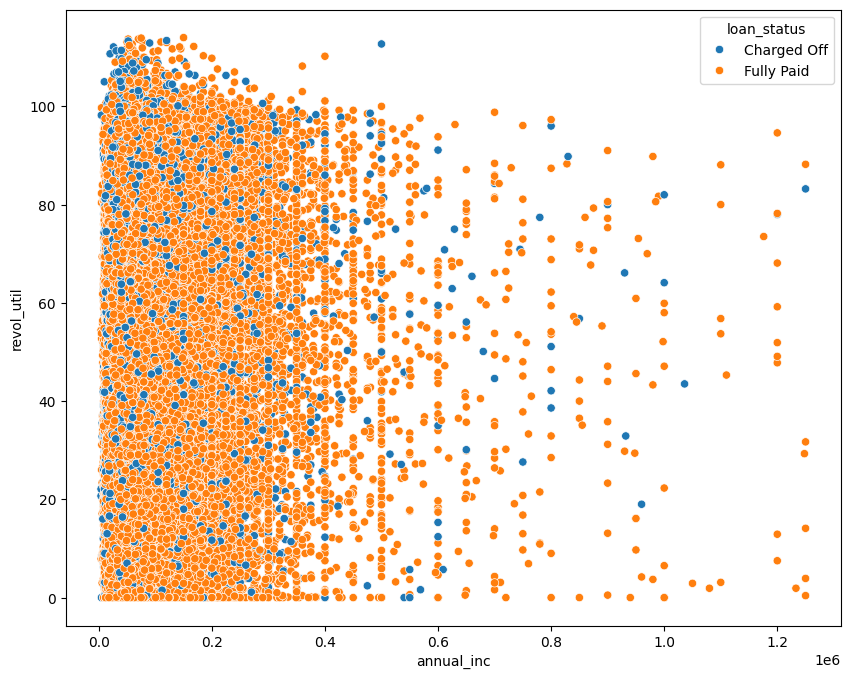

In [ ]:
 plt.figure(figsize = (10,8))
sns.scatterplot(x='annual_inc', y='revol_util', hue='loan_status', data=df)

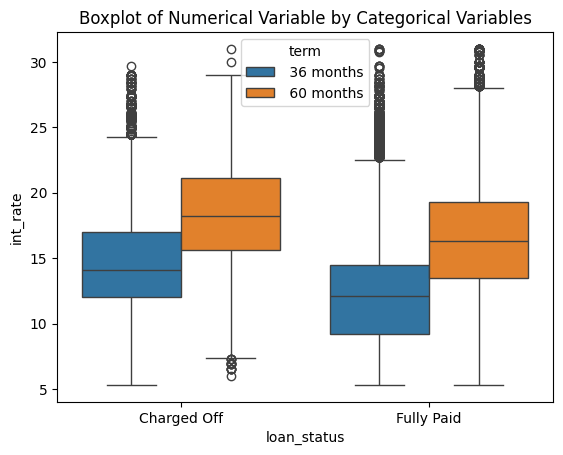

In [ ]:
sns.boxplot(x='loan_status', y='int_rate', hue='term', data=df)
plt.title('Boxplot of Numerical Variable by Categorical Variables')
plt.show()

In [ ]:
loan_status_term_percentage = df.groupby(['loan_status', 'term'])['loan_status'].count().unstack().apply(lambda row: row / row.sum() * 100, axis=1)

loan_status_term_percentage

term          36 months   60 months
loan_status                        
Charged Off   61.333076   38.666924
Fully Paid    79.900388   20.099612

**Observations:**

* Both "Fully Paid" and "Charged Off" long term (60 months) borrowers appear to be paying higher interest rates compared to short term borrowers within their group. However, high interest rate might not be a very strong indicator as there are high interest borrowers in the Fully Paid group.
* There's a higher proportion of long term borrowers amongst 'Charged Off' borrowers indicating term is a factor.
* There are more defaulters amongst borrowers with lower incomes and higher interest rate
* Surprisingly there are loan defaulters amongst borrowers with high income and low dti. There are more defaulters amongst borrowers with high dti and low income.


#**Feature Selection**

In [ ]:
df_backup2 = df.copy()

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  \
0    10000.0   36 months     11.44       329.48     B        B4   
1     8000.0   36 months     11.99       265.68     B        B5   
2    15600.0   36 months     10.49       506.97     B        B3   
3     7200.0   36 months      6.49       220.65     A        A2   
4    24375.0   60 months     17.27       609.33     C        C5   

                 emp_title  emp_length home_ownership  annual_inc  \
0                Marketing        10.0           RENT    117000.0   
1          Credit analyst          4.0       MORTGAGE     65000.0   
2             Statistician         0.0           RENT     43057.0   
3          Client Advocate         6.0           RENT     54000.0   
4  Destiny Management Inc.         9.0       MORTGAGE     55000.0   

  verification_status  loan_status             purpose    dti  open_acc  \
0        Not Verified   Fully Paid            vacation  26.24      16.0   
1        Not Verified   Fully Paid  debt_consolidation  22.05      17.0   
2     Source Verified   Fully Paid         credit_card  12.79      13.0   
3        Not Verified   Fully Paid         credit_card   2.60       6.0   
4            Verified  Charged Off         credit_card  33.95      13.0   

  pub_rec  revol_bal  revol_util  total_acc initial_list_status  \
0       N    36369.0        41.8       25.0                   w   
1       N    20131.0        53.3       27.0                   f   
2       N    11987.0        92.2       26.0                   f   
3       N     5472.0        21.5       13.0                   f   
4       N    24584.0        69.8       43.0                   f   

  application_type  mort_acc pub_rec_bankruptcies  credit_yrs zip_codes state  
0       INDIVIDUAL       0.0                 None        25.0  OK 22690    OK  
1       INDIVIDUAL       3.0                 None        11.0  SD 05113    SD  
2       INDIVIDUAL       0.0                 None         8.0  WV 05113    WV  
3       INDIVIDUAL       0.0                 None         8.0  MA 00813    MA  
4       INDIVIDUAL       1.0                 None        14.0  VA 11650    VA

In [ ]:
#dropping initial_list_status since there's little information and variation in the feature as seen in the countplot.

df.drop("initial_list_status", inplace = True, axis = 1)

In [ ]:
# dropping emp_title. There are over 170,000 values and the entries are not clean

df.drop("emp_title", inplace = True, axis = 1)

In [ ]:
# dropping state. Location data since zip codes provide more granular location data

df.drop("state", inplace = True, axis = 1)

In [ ]:
df.head()

loan_amnt        term  int_rate  installment grade sub_grade  emp_length  \
0    10000.0   36 months     11.44       329.48     B        B4        10.0   
1     8000.0   36 months     11.99       265.68     B        B5         4.0   
2    15600.0   36 months     10.49       506.97     B        B3         0.0   
3     7200.0   36 months      6.49       220.65     A        A2         6.0   
4    24375.0   60 months     17.27       609.33     C        C5         9.0   

  home_ownership  annual_inc verification_status  loan_status  \
0           RENT    117000.0        Not Verified   Fully Paid   
1       MORTGAGE     65000.0        Not Verified   Fully Paid   
2           RENT     43057.0     Source Verified   Fully Paid   
3           RENT     54000.0        Not Verified   Fully Paid   
4       MORTGAGE     55000.0            Verified  Charged Off   

              purpose    dti  open_acc pub_rec  revol_bal  revol_util  \
0            vacation  26.24      16.0       N    36369.0        41.8   
1  debt_consolidation  22.05      17.0       N    20131.0        53.3   
2         credit_card  12.79      13.0       N    11987.0        92.2   
3         credit_card   2.60       6.0       N     5472.0        21.5   
4         credit_card  33.95      13.0       N    24584.0        69.8   

   total_acc application_type  mort_acc pub_rec_bankruptcies  credit_yrs  \
0       25.0       INDIVIDUAL       0.0                 None        25.0   
1       27.0       INDIVIDUAL       3.0                 None        11.0   
2       26.0       INDIVIDUAL       0.0                 None         8.0   
3       13.0       INDIVIDUAL       0.0                 None         8.0   
4       43.0       INDIVIDUAL       1.0                 None        14.0   

  zip_codes  
0  OK 22690  
1  SD 05113  
2  WV 05113  
3  MA 00813  
4  VA 11650

In [ ]:
df_backup3 = df.copy()

In [ ]:
df = df_backup3

In [ ]:
df_backup3['home_ownership'].value_counts()

home_ownership
MORTGAGE    198249
RENT        159755
OWN          37725
OTHER          112
NONE            31
ANY              3
Name: count, dtype: int64

# **Pre-processing:** Encoding, Data Split, Scaling, VIF Check



In [ ]:
!pip install --upgrade category_encoders
from category_encoders import TargetEncoder
from sklearn.preprocessing import LabelEncoder
from category_encoders import OneHotEncoder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.6 MB/s eta 0:00:00


## **Converting Binary Columns to Numerical Values**



In [ ]:
# Setting values of Target variable to 1 and 0. "Fully Paid" == 1 , "Charged Off" == 0

df['loan_status'] = df['loan_status'].map({'Fully Paid': 1, 'Charged Off':0}).astype(int)

In [ ]:
# Changing 'term' values to numerical

df['term'] = df['term'].str.replace(' months', '', regex=False).astype(int)

In [ ]:
# Changing 'pub_rec' values to numerical. Y = 1, N = 0

df['pub_rec'] = df['pub_rec'].map({'Y': 1, 'N': 0})

In [ ]:
df['pub_rec'] = df['pub_rec'].astype('int64')

In [ ]:
# Changing 'verification_status' to numerical. "Verified" OR "Source Verified" = 1, "Not Verified" = 0

df['verification_status'] = df['verification_status'].map({'Source Verified': 1,'Verified': 1, 'Not Verified': 0})
df['verification_status'] = df['verification_status'].astype('int64')

In [ ]:
df.head()

loan_amnt  term  int_rate  installment grade sub_grade  emp_length  \
0    10000.0    36     11.44       329.48     B        B4        10.0   
1     8000.0    36     11.99       265.68     B        B5         4.0   
2    15600.0    36     10.49       506.97     B        B3         0.0   
3     7200.0    36      6.49       220.65     A        A2         6.0   
4    24375.0    60     17.27       609.33     C        C5         9.0   

  home_ownership  annual_inc  verification_status  loan_status  \
0           RENT    117000.0                    0            1   
1       MORTGAGE     65000.0                    0            1   
2           RENT     43057.0                    1            1   
3           RENT     54000.0                    0            1   
4       MORTGAGE     55000.0                    1            0   

              purpose    dti  open_acc  pub_rec  revol_bal  revol_util  \
0            vacation  26.24      16.0        0    36369.0        41.8   
1  debt_consolidation  22.05      17.0        0    20131.0        53.3   
2         credit_card  12.79      13.0        0    11987.0        92.2   
3         credit_card   2.60       6.0        0     5472.0        21.5   
4         credit_card  33.95      13.0        0    24584.0        69.8   

   total_acc application_type  mort_acc pub_rec_bankruptcies  credit_yrs  \
0       25.0       INDIVIDUAL       0.0                 None        25.0   
1       27.0       INDIVIDUAL       3.0                 None        11.0   
2       26.0       INDIVIDUAL       0.0                 None         8.0   
3       13.0       INDIVIDUAL       0.0                 None         8.0   
4       43.0       INDIVIDUAL       1.0                 None        14.0   

  zip_codes  
0  OK 22690  
1  SD 05113  
2  WV 05113  
3  MA 00813  
4  VA 11650

## **Label Encoding:**

**grade, sub_grade, pub_rec_bankruptcies** have ordinal categories.

We will apply Label Encoding to convert these categories to numerical values.



In [ ]:
le = LabelEncoder()

df['grade'] = le.fit_transform(df['grade'])
df['sub_grade'] = le.fit_transform(df['sub_grade'])
df['pub_rec_bankruptcies'] = le.fit_transform(df['pub_rec_bankruptcies'])


## **One-Hot Encoding**

**home_ownership & application_type** do not have ordered categories and have low cardinality and are suitable for One-Hot Encoding.




In [ ]:
ohe = OneHotEncoder(use_cat_names=True)

df_encoded = ohe.fit_transform(df[['home_ownership', 'application_type']])


df = pd.concat([df, df_encoded], axis=1).drop(['home_ownership', 'application_type'], axis=1)


In [ ]:
df.head()

## **Train - Validation - Test Split**

Splitting the data before applying Target Encoding.

60% of the data will be used for training

20% of the the data will be used for validation and hyperparameter tuning

20% of the data will be used for model testing

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df_tr_val, df_test = train_test_split(df, test_size = 0.2, random_state=1)
df_tr, df_val = train_test_split(df_tr_val, test_size=0.25,random_state=1)

In [ ]:
df_tr.shape

(237525, 30)

In [ ]:
df_test.shape

(79175, 30)

In [ ]:
df_val.shape

(79175, 30)

In [ ]:
#Creating Datasets for Training, Validation and Testing

# Training Data
y_train = df_tr['loan_status']
X_train = df_tr.drop('loan_status', axis=1)

# Validation Data
y_val = df_val['loan_status']
X_val = df_val.drop('loan_status', axis=1)

# Test Data
y_test = df_test['loan_status']
X_test = df_test.drop('loan_status', axis=1)


In [ ]:
X_train.shape, y_train.shape

((237525, 29), (237525,))

In [ ]:
X_val.shape, y_val.shape

((79175, 29), (79175,))

In [ ]:
X_test.shape, y_test.shape

((79175, 29), (79175,))

In [ ]:
y_train.index

Index([ 59414, 269416, 318243, 387619, 316574, 205346, 148622, 327289, 218282,
       214839,
       ...
       350706, 282428,   6615, 279780, 393132, 155129, 126699, 369224, 221412,
       324735],
      dtype='int64', length=237525)

# **Target Encoding**
Encoding 'purpose' and 'zip_codes' using target encoder since both columns are not ordinal and have high cardinality. The categories will be replaced with target probabilities.

In [ ]:
#Target Encoding 'purpose'

te = TargetEncoder()

#Fit and transform train data
X_train['purpose'] = te.fit_transform(X_train['purpose'], y_train)

# Tranform val and test data
X_val['purpose'] = te.transform(X_val['purpose'])
X_test['purpose'] = te.transform(X_test['purpose'])


In [ ]:
#Target Encoding 'zip_codes'

te = TargetEncoder()

#Fit and transform train data
X_train['zip_codes'] = te.fit_transform(X_train['zip_codes'], y_train)

# Tranform val and test data
X_val['zip_codes'] = te.transform(X_val['zip_codes'])
X_test['zip_codes'] = te.transform(X_test['zip_codes'])

In [ ]:
X_train.head()

loan_amnt  term  int_rate  installment  grade  sub_grade  emp_length  \
59414     12000.0    60      9.71       253.26      1          5         1.0   
269416    32350.0    60     18.64       832.79      4         20        10.0   
318243     6000.0    36     15.99       210.92      2         14         1.0   
387619    15000.0    36     13.33       507.80      2         12         2.0   
316574     5000.0    36     12.39       167.01      2         10         9.0   

        annual_inc  verification_status   purpose    dti  open_acc  pub_rec  \
59414      70000.0                    1  0.792515  15.17      11.0        0   
269416    114000.0                    1  0.792515  24.81      15.0        0   
318243     45000.0                    1  0.832449  31.89       5.0        0   
387619     45000.0                    0  0.792515  24.56      12.0        0   
316574     42400.0                    1  0.782237  20.78       4.0        0   

        revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
59414     18630.0        25.6       32.0       7.0                     1   
269416    35343.0        68.7       32.0       0.0                     1   
318243     8906.0        36.5        7.0       0.0                     1   
387619     8595.0        63.0       30.0       2.0                     1   
316574    11946.0        87.2       10.0       0.0                     1   

        credit_yrs  zip_codes  home_ownership_RENT  home_ownership_MORTGAGE  \
59414         25.0   0.830357                    0                        0   
269416        22.0   0.807131                    0                        1   
318243        30.0   0.817568                    1                        0   
387619        21.0   1.000000                    0                        1   
316574        13.0   0.785448                    0                        1   

        home_ownership_OWN  home_ownership_OTHER  home_ownership_NONE  \
59414                    1                     0                    0   
269416                   0                     0                    0   
318243                   0                     0                    0   
387619                   0                     0                    0   
316574                   0                     0                    0   

        home_ownership_ANY  application_type_INDIVIDUAL  \
59414                    0                            1   
269416                   0                            1   
318243                   0                            1   
387619                   0                            1   
316574                   0                            1   

        application_type_JOINT  application_type_DIRECT_PAY  
59414                        0                            0  
269416                       0                            0  
318243                       0                            0  
387619                       0                            0  
316574                       0                            0

# **Checking and Handling Data Imbalance**

In [ ]:
X_train_backup = X_train.copy()
y_train_backup = y_train.copy()

In [ ]:
y_train.value_counts(normalize = True)

loan_status
1    0.80341
0    0.19659
Name: proportion, dtype: float64

**Observation**:

The training dataset is highly imbalanced. We have 80% (190830) of datapoints in the positive class and 20% (46695) of datapoints in the negative class.

The dataset has to be balanced to avoid bias.



In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
print("Before SMOTE:")
print(print(y_train.value_counts()))

Before SMOTE:
loan_status
1    190830
0     46695
Name: count, dtype: int64
None


In [ ]:
#Applying SMOTE

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)


In [ ]:
print("After SMOTE:")
print(print(y_train.value_counts()))

After SMOTE:
loan_status
1    190830
0    190830
Name: count, dtype: int64
None


# **Scaling**



In [ ]:
#Backup Data

X_train_unscaled = X_train.copy()
y_train_unscaled = y_train.copy()

X_val_unscaled = X_val.copy()
y_val_unscaled = y_val.copy()

X_test_unscaled = X_test.copy()
y_test_unscaled = y_test.copy()


In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)
X_test = pd.DataFrame(scaler.fit_transform(X_test), columns = X_test.columns


In [ ]:
X_train.head()

loan_amnt  term  int_rate  installment     grade  sub_grade  emp_length  \
0   0.291139   1.0  0.171017     0.156882  0.166667   0.147059         0.1   
1   0.806329   1.0  0.518894     0.540487  0.666667   0.588235         1.0   
2   0.139241   0.0  0.415660     0.128857  0.333333   0.411765         0.1   
3   0.367089   0.0  0.312037     0.325368  0.333333   0.352941         0.2   
4   0.113924   0.0  0.275419     0.099791  0.333333   0.294118         0.9   

   annual_inc  verification_status   purpose       dti  open_acc  pub_rec  \
0    0.052970                  1.0  0.498708  0.304435  0.122222      0.0   
1    0.088283                  1.0  0.498708  0.497893  0.166667      0.0   
2    0.032905                  1.0  0.718598  0.639976  0.055556      0.0   
3    0.032905                  0.0  0.498708  0.492876  0.133333      0.0   
4    0.030819                  1.0  0.442121  0.417018  0.044444      0.0   

   revol_bal  revol_util  total_acc  mort_acc  pub_rec_bankruptcies  \
0   0.035305    0.225154   0.202703  0.225806                   0.5   
1   0.066976    0.604222   0.202703  0.000000                   0.5   
2   0.016877    0.321020   0.033784  0.000000                   0.5   
3   0.016288    0.554090   0.189189  0.064516                   0.5   
4   0.022638    0.766931   0.054054  0.000000                   0.5   

   credit_yrs  zip_codes  home_ownership_RENT  home_ownership_MORTGAGE  \
0    0.360656   0.830357                  0.0                      0.0   
1    0.311475   0.807131                  0.0                      1.0   
2    0.442623   0.817568                  1.0                      0.0   
3    0.295082   1.000000                  0.0                      1.0   
4    0.163934   0.785448                  0.0                      1.0   

   home_ownership_OWN  home_ownership_OTHER  home_ownership_NONE  \
0                 1.0                   0.0                  0.0   
1                 0.0                   0.0                  0.0   
2                 0.0                   0.0                  0.0   
3                 0.0                   0.0                  0.0   
4                 0.0                   0.0                  0.0   

   home_ownership_ANY  application_type_INDIVIDUAL  application_type_JOINT  \
0                 0.0                          1.0                     0.0   
1                 0.0                          1.0                     0.0   
2                 0.0                          1.0                     0.0   
3                 0.0                          1.0                     0.0   
4                 0.0                          1.0                     0.0   

   application_type_DIRECT_PAY  
0                          0.0  
1                          0.0  
2                          0.0  
3                          0.0  
4                          0.0

### **Note**:

* Scaling was changed from StandardScaler to MinMax Scaler after seeing noticeable improvement in model performance on applying MinMax Scaler. This is likely due to certain important features being skewed. The outliers were not removed to avoid information loss and extreme values in data like annual_income and loan_amounts are expected.

* Changing the Scaler also had an impact on multicollinearity. The VIF scores for certain features which were already high after applying Standard Scaler further increased (drastically) on applying the MinMax Scaler. However, the MinMax Scaler improved the scores significantly.



# **Check for Multicollinearity**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
X_vif = X_train.copy()

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['R2_score'] = 1 - (1/vif['VIF'])


In [ ]:
vif[vif["VIF"] > 10].sort_values('VIF', ascending = False)

Features         VIF  R2_score
0                     loan_amnt  238.935580  0.995815
3                   installment  210.658152  0.995253
5                     sub_grade  164.382873  0.993917
2                      int_rate  118.694886  0.991575
26  application_type_INDIVIDUAL   78.597908  0.987277
4                         grade   46.902545  0.978679
17         pub_rec_bankruptcies   33.229665  0.969906
9                       purpose   21.170869  0.952765
11                     open_acc   13.981358  0.928476
15                    total_acc   12.644120  0.920912
1                          term   10.213918  0.902094

**Observations**:

Extreme multicollinearity with VIF > 10 can be observed with the following features:
* loan_amnt
* installment
* sub_grade
* int_rate
* application_type_INDIVIDUAL
* grade
* pub_rec_bankruptcies
* purpose
* open_acc
* total_acc




In [ ]:
X_train[['pub_rec_bankruptcies','pub_rec']].corr()

pub_rec_bankruptcies   pub_rec
pub_rec_bankruptcies              1.000000  0.735485
pub_rec                           0.735485  1.000000

In [ ]:
X_train[['open_acc','total_acc']].corr()

open_acc  total_acc
open_acc   1.000000   0.687705
total_acc  0.687705   1.000000

# **Feature Selection based on VIF**

* Since 'installment' is calculated based on loan_amount and used to calculate 'dti' we can drop the feature without losing information.

* 'sub_grade' is futher classification of 'grade' hence removing the feature may not cause loss of vital information.

* We earlier noted that there a variation in 'loan_amount' and 'interest_rate' between the target classes so it may not merit dropping the features.

* There's a strong correlation between 'pub_rec_bankruptcies','pub_rec' and we saw there was not much of a difference in loan_status in the group within these features. We can drop 'pub_rec' and see if it decreses collinearity.

* There's also a strong correlation between 'open_acc' and 'total_acc'. Dropping one of these features may reduce collinearity.

* We will also drop the application_types and see if it reduces VIF and affects model performance.  

We can drop the 'installment' and 'sub_grade' features and check model performance.

In [ ]:
X_vif.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_length', 'annual_inc', 'verification_status', 'purpose', 'dti',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'mort_acc', 'pub_rec_bankruptcies', 'credit_yrs', 'zip_codes',
       'home_ownership_RENT', 'home_ownership_MORTGAGE', 'home_ownership_OWN',
       'home_ownership_OTHER', 'home_ownership_NONE', 'home_ownership_ANY',
       'application_type_INDIVIDUAL', 'application_type_JOINT',
       'application_type_DIRECT_PAY'],
      dtype='object')

In [ ]:
X_vif.drop(['installment','sub_grade','total_acc', 'pub_rec','application_type_INDIVIDUAL', 'application_type_JOINT',
       'application_type_DIRECT_PAY'], axis = 1, inplace = True)

In [ ]:
vif = pd.DataFrame()
vif['Features'] = X_vif.columns
vif['VIF'] = [variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])]
vif['R2_score'] = 1 - (1/vif['VIF'])


In [ ]:
vif[vif["VIF"] > 10].sort_values('VIF', ascending = False)

Features        VIF  R2_score
2               int_rate  43.964694  0.977254
3                  grade  26.972843  0.962926
7                purpose  15.201088  0.934215
13  pub_rec_bankruptcies  13.521740  0.926045

# **Observations**:
* VIF appears to have reduced for many of the features after selection and dropping.
* However, VIF continues to remain high for features such as int_rate, grade, purpose and pub_rec_bankruptcies.
* Since these features are important, we will retain them and evaluate model performance.

___________________

---



# **Logistic Regression**

To classify borrowers as creditworhy (eligible for loan) or not creditworhy (ineligible for loan) we will build a  Logistic Regression model using the Training Data and evaluate its performance on the Test Data.

### **Evaluation Metric: F1 Score**

When it comes to loan eligibiltiy  it is important to avoid classifying potential defaulters as creditworthy (False Positive) and creditworthy borrowers as potential defaulters (False Negative).

In this case we have to aim for high Precision and Recall which means The F1 score will be of utmost importance in evaluating the model.



In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay,
                             f1_score, recall_score,
                             precision_score, precision_recall_curve,
                             average_precision_score, classification_report)

In [ ]:
model = LogisticRegression()

### **Logistic Regression with all columns**

In [ ]:
# Fitting Model
model.fit(X_train, y_train)

# Model Prediction
yhat_train = model.predict(X_train)
yhat_val = model.predict(X_val)
yhat_test = model.predict(X_test)


In [ ]:
#Model Scores for Training Data
print('Train Accuracy :', round(model.score(X_train, y_train),2))
print('Train F1 Score:', round(f1_score(y_train,yhat_train),2))
print('Train Recall Score:',round(recall_score(y_train,yhat_train),2))
print('Train Precision Score:', round(precision_score(y_train,yhat_train),2))


Train Accuracy : 0.89
Train F1 Score: 0.89
Train Recall Score: 0.94
Train Precision Score: 0.85


In [ ]:
#Model Evaluation using Validation Data

print('Validation Accuracy :', round(model.score(X_val,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,yhat_val),2))
print('Validation Recall Score:',round(recall_score(y_val,yhat_val),2))
print('Validation Precision Score:', round(precision_score(y_val,yhat_val),2))


Validation Accuracy : 0.86
Validation F1 Score: 0.92
Validation Recall Score: 0.93
Validation Precision Score: 0.9


In [ ]:
#Model Evaluation using Test Data

print('Test Accuracy :', round(model.score(X_test,y_test), 2))
print('Test F1 Score:', round(f1_score(y_test,yhat_test), 2))
print('Test Recall Score:', round(recall_score(y_test,yhat_test), 2))
print('Test Precision Score:', round(precision_score(y_test,yhat_test), 2))


Test Accuracy : 0.86
Test F1 Score: 0.91
Test Recall Score: 0.92
Test Precision Score: 0.91


### **Logistic Regression with Vif fixed data**

In [ ]:
model2 = LogisticRegression()

In [ ]:
X_val_vif = X_val.drop(['installment','sub_grade','total_acc', 'pub_rec','application_type_INDIVIDUAL', 'application_type_JOINT',
       'application_type_DIRECT_PAY'], axis = 1)

In [ ]:
X_test_vif = X_test.drop(['installment','sub_grade','total_acc', 'pub_rec','application_type_INDIVIDUAL', 'application_type_JOINT',
       'application_type_DIRECT_PAY'], axis = 1)

In [ ]:
X_val_vif.head()

loan_amnt  term  int_rate     grade  emp_length  annual_inc  \
0   0.344937   0.0  0.207635  0.166667         0.2    0.044944   
1   0.302532   0.0  0.363070  0.333333         0.4    0.024880   
2   0.443038   0.0  0.259836  0.166667         0.6    0.097111   
3   0.030380   0.0  0.100117  0.000000         0.2    0.073836   
4   0.367089   1.0  0.111414  0.166667         0.4    0.032905   

   verification_status   purpose       dti  open_acc  revol_bal  revol_util  \
0                  0.0  0.498708  0.261037  0.070175   0.000907    0.375439   
1                  1.0  0.498708  0.705549  0.175439   0.019961    0.466667   
2                  1.0  0.718598  0.178210  0.157895   0.049693    0.754386   
3                  0.0  0.498708  0.141555  0.192982   0.014115    0.699123   
4                  1.0  0.718598  0.580599  0.175439   0.031535    0.744737   

   mort_acc  pub_rec_bankruptcies  credit_yrs  zip_codes  home_ownership_RENT  \
0   0.00000                   0.5    0.059701   0.797639                  0.0   
1   0.00000                   0.5    0.089552   0.789799                  1.0   
2   0.03125                   0.5    0.149254   1.000000                  0.0   
3   0.00000                   0.5    0.149254   0.812759                  1.0   
4   0.00000                   0.5    0.253731   0.789799                  1.0   

   home_ownership_MORTGAGE  home_ownership_OWN  home_ownership_OTHER  \
0                      1.0                 0.0                   0.0   
1                      0.0                 0.0                   0.0   
2                      1.0                 0.0                   0.0   
3                      0.0                 0.0                   0.0   
4                      0.0                 0.0                   0.0   

   home_ownership_NONE  home_ownership_ANY  
0                  0.0                 0.0  
1                  0.0                 0.0  
2                  0.0                 0.0  
3                  0.0                 0.0  
4                  0.0                 0.0

In [ ]:
model2.fit(X_vif, y_train)

# Model Prediction
yhat_train = model2.predict(X_vif)
yhat_val = model2.predict(X_val_vif)
yhat_test = model2.predict(X_test_vif)

In [ ]:
#Model Scores for Training Data
print('Train Accuracy :', round(model2.score(X_vif, y_train),2))
print('Train F1 Score:', round(f1_score(y_train,yhat_train),2))
print('Train Recall Score:',round(recall_score(y_train,yhat_train),2))
print('Train Precision Score:', round(precision_score(y_train,yhat_train),2))

Train Accuracy : 0.88
Train F1 Score: 0.89
Train Recall Score: 0.94
Train Precision Score: 0.84


In [ ]:
#Model Evaluation using Validation Data

print('Validation Accuracy :', round(model2.score(X_val_vif,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,yhat_val),2))
print('Validation Recall Score:',round(recall_score(y_val,yhat_val),2))
print('Validation Precision Score:', round(precision_score(y_val,yhat_val),2))


Validation Accuracy : 0.86
Validation F1 Score: 0.91
Validation Recall Score: 0.93
Validation Precision Score: 0.9


In [ ]:
#Model Evaluation using Validation Data

print('Test Accuracy :', round(model2.score(X_test_vif,y_test), 2))
print('Test F1 Score:', round(f1_score(y_test,yhat_test), 2))
print('Test Recall Score:', round(recall_score(y_test,yhat_test), 2))
print('Test Precision Score:', round(precision_score(y_test,yhat_test), 2))

Test Accuracy : 0.86
Test F1 Score: 0.91
Test Recall Score: 0.92
Test Precision Score: 0.9


## **Observations**:

* The model achieved a good F1 score of 0.89 on training predictions and 0.91 on validation and test prediction.

* The model F1 score further improves to 0.92 on validation and test predictions when trained on the dataset after dropping columns with extreme VIF.  

* Preferring fewer features and lower dimensionality here on we will use the dataset without the high VIF features to train the model.  

* Interestingly, the accuracy metric of the model drops slightly  on validation and test prediction but the F1, Recall and Precision Scores improve noticeably.  

* We will further apply Regularization to reduce the coefficients of less important features and improve model performance.


# **Hyperparameter Tuning : Regularization**

## **Ridge (L2) Regularization with various different different λs**

In [ ]:
train_scores = []
val_scores = []
lambdas = []

for lam in np.arange(0.0001,1000,50):
  model_l2 = LogisticRegression(penalty='l2', C = 1/lam, solver='saga' )
  model_l2.fit(X_vif, y_train)

  yhat_train = model_l2. predict(X_vif)
  yhat_val = model_l2. predict(X_val_vif)
  train_f1 = f1_score(y_train, yhat_train)
  val_f1 = f1_score(y_val, yhat_val)

  train_scores.append(train_f1)
  val_scores.append(val_f1)
  lambdas.append(lam)


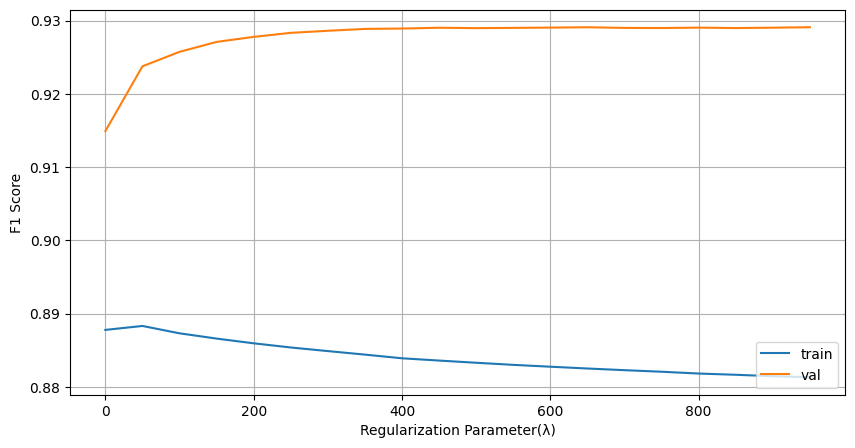

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.0001,1000,50)), train_scores, label="train")
plt.plot(list(np.arange(0.0001,1000,50)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

In [ ]:
max(val_scores)

0.9291106526716691

In [ ]:
model_l2_scores = pd.DataFrame({'Training F1': train_scores, 'Validation F1': val_scores, 'RP': lambdas})
model_l2_scores.sort_values('Validation F1', ascending = False).head()

Training F1  Validation F1        RP
19     0.881327       0.929111  950.0001
13     0.882516       0.929106  650.0001
12     0.882762       0.929058  600.0001
16     0.881829       0.929054  800.0001
18     0.881465       0.929048  900.0001

In [ ]:
#Model Scores for Training Data
print('Train Accuracy :', round(model_l2.score(X_vif, y_train),2))
print('Train F1 Score:', round(f1_score(y_train,yhat_train),2))
print('Train Recall Score:',round(recall_score(y_train, yhat_train),2))
print('Train Precision Score:', round(precision_score(y_train,yhat_train),2))

Train Accuracy : 0.87
Train F1 Score: 0.88
Train Recall Score: 0.97
Train Precision Score: 0.81


In [ ]:
#Model Scores for Validation Data
print('Validation Accuracy :', round(model_l2.score(X_val_vif,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,yhat_val),2))
print('Validation Recall Score:',round(recall_score(y_val,yhat_val),2))
print('Validation Precision Score:', round(precision_score(y_val,yhat_val),2))

Validation Accuracy : 0.88
Validation F1 Score: 0.93
Validation Recall Score: 0.97
Validation Precision Score: 0.9


## **Lasso (L1) Regularization with various different different λs**

In [ ]:
train_scores = []
val_scores = []
lambdas = []

for lam in np.arange(0.0001,5000,500):
  model_l1 = LogisticRegression(penalty='l1', C = 1/lam, solver='saga')
  model_l1.fit(X_vif, y_train)

  yhat_train = model_l1. predict(X_vif)
  yhat_val = model_l1. predict(X_val_vif)
  train_f1 = f1_score(y_train, yhat_train)
  val_f1 = f1_score(y_val, yhat_val)

  train_scores.append(train_f1)
  val_scores.append(val_f1)
  lambdas.append(lam)

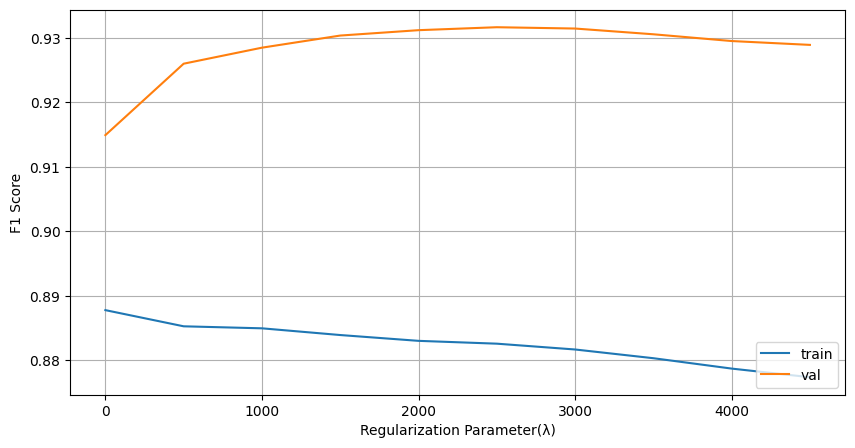

In [ ]:

plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.0001,5000,500)), train_scores, label="train")
plt.plot(list(np.arange(0.0001,5000,500)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("F1 Score")
plt.grid()
plt.show()


In [ ]:
model_l1_scores = pd.DataFrame({'Training F1': train_scores, 'Validation F1': val_scores, 'RP': lambdas})
model_l1_scores.sort_values('Validation F1', ascending = False).head()

Training F1  Validation F1         RP
5     0.882585       0.931671  2500.0001
6     0.881683       0.931466  3000.0001
4     0.883023       0.931212  2000.0001
7     0.880331       0.930577  3500.0001
3     0.883925       0.930379  1500.0001

# **Elastic Net Regularization with various different λs**

In [ ]:
train_scores = []
val_scores = []
lambdas = []

for lam in np.arange(0.001,5000,100):
  model_en = LogisticRegression(penalty='elasticnet', C = 1/lam, solver='saga', l1_ratio=0.5)
  model_en.fit(X_vif, y_train)

  yhat_train = model_en. predict(X_vif)
  yhat_val = model_en. predict(X_val_vif)
  train_f1 = f1_score(y_train, yhat_train)
  val_f1 = f1_score(y_val, yhat_val)

  train_scores.append(train_f1)
  val_scores.append(val_f1)
  lambdas.append(lam)

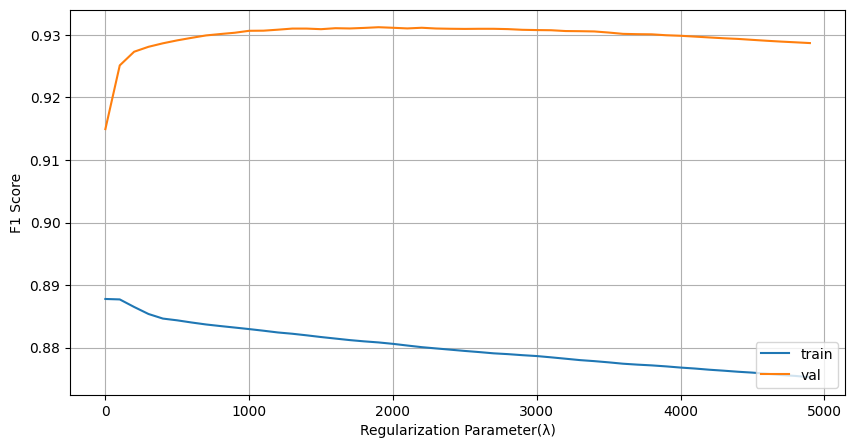

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.001,5000,100)), train_scores, label="train")
plt.plot(list(np.arange(0.001,5000,100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("F1 Score")
plt.grid()
plt.show()

In [ ]:
model_en_scores = pd.DataFrame({'Training F1': train_scores, 'Validation F1': val_scores, 'RP': lambdas})
model_en_scores.sort_values('Validation F1', ascending = False).head()

Training F1  Validation F1        RP
19     0.880842       0.931222  1900.001
22     0.880087       0.931135  2200.001
20     0.880617       0.931133  2000.001
18     0.881013       0.931111  1800.001
16     0.881460       0.931065  1600.001

In [ ]:
#Model Scores for Training Data
print('Train Accuracy :', round(model_en.score(X_vif, y_train),2))
print('Train F1 Score:', round(f1_score(y_train,yhat_train),2))
print('Train Recall Score:',round(recall_score(y_train, yhat_train),2))
print('Train Precision Score:', round(precision_score(y_train,yhat_train),2))

Train Accuracy : 0.86
Train F1 Score: 0.88
Train Recall Score: 0.97
Train Precision Score: 0.8


In [ ]:
#Model Scores for Validation Data
print('Validation Accuracy :', round(model_en.score(X_val_vif,y_val),2))
print('Validation F1 Score:', round(f1_score(y_val,yhat_val),2))
print('Validation Recall Score:',round(recall_score(y_val,yhat_val),2))
print('Validation Precision Score:', round(precision_score(y_val,yhat_val),2))

Validation Accuracy : 0.88
Validation F1 Score: 0.93
Validation Recall Score: 0.97
Validation Precision Score: 0.89


## **Observations & Action**

* The F1 score improved from 0.92 to 0.931 on applying Elastic Net Regularization with a Regularization Constant of 2100.

* There appears to be a drop in the precision score for training data, however given the importance of F1 score in this case, it's reasonable to go ahead with the elastic net regularization model and parameters.

#**Final Build & Evaluation**



Using the Regularization Constant as 2100, we will build, test and evaluate the model and interpret it's coefficients.



In [ ]:
model_loantap = LogisticRegression(penalty='elasticnet', C = 1/2100, solver='saga', l1_ratio=0.5)

model_loantap.fit(X_vif, y_train)

yhat_train = model_loantap.predict(X_vif)
yhat_test = model_loantap.predict(X_test_vif)


## **Evaluation: Classification Metrics** - F1 Score, Accuracy, Recall, Precision

In [ ]:
#Model Scores for Training Data
print('Train Accuracy :', round(model_loantap.score(X_vif, y_train),2))
print('Train F1 Score:', round(f1_score(y_train,yhat_train),2))
print('Train Recall Score:',round(recall_score(y_train, yhat_train),2))
print('Train Precision Score:', round(precision_score(y_train,yhat_train),2))

Train Accuracy : 0.87
Train F1 Score: 0.88
Train Recall Score: 0.98
Train Precision Score: 0.8


In [ ]:
#Model Scores for Test Data
print('Test Accuracy :', round(model_en.score(X_test_vif,y_val),2))
print('Test F1 Score:', round(f1_score(y_test,yhat_test),2))
print('Test Recall Score:',round(recall_score(y_test,yhat_test),2))
print('Test Precision Score:', round(precision_score(y_test,yhat_test),2))

Test Accuracy : 0.73
Test F1 Score: 0.93
Test Recall Score: 0.97
Test Precision Score: 0.89


## **Evaluation: AUC- ROC**



In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
prob = model_loantap.predict_proba(X_test_vif)
prob

array([[0.16170155, 0.83829845],
       [0.95762138, 0.04237862],
       [0.24924891, 0.75075109],
       ...,
       [0.97434037, 0.02565963],
       [0.29106954, 0.70893046],
       [0.34232912, 0.65767088]])

In [ ]:
probabilites = prob[:,1]
probabilites

array([0.83829845, 0.04237862, 0.75075109, ..., 0.02565963, 0.70893046,
       0.65767088])

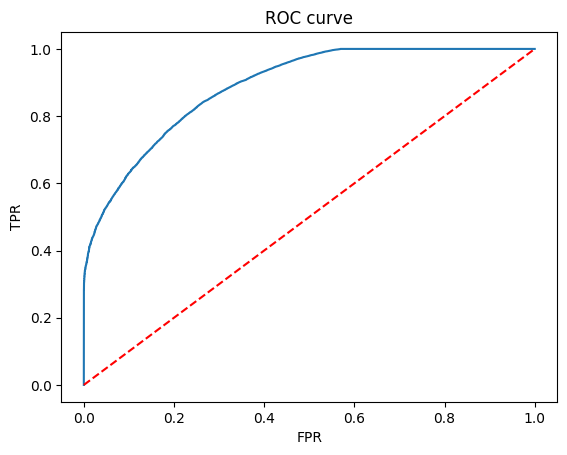

In [ ]:
fpr, tpr, thr = roc_curve(y_test,probabilites)

plt.plot(fpr,tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [ ]:
roc_auc_score(y_test,probabilites)

0.8897328213286224

# **Feature Importance & Model Interpretation**



In [ ]:
feature_imp = pd.DataFrame({"Features" : X_vif.columns, "Coefficients": pd.DataFrame(list(model_loantap.coef_.T))[0] })
feature_imp.sort_values("Coefficients", ascending = False)

Features  Coefficients
15                zip_codes      4.770384
17  home_ownership_MORTGAGE      1.945473
18       home_ownership_OWN      1.620942
16      home_ownership_RENT      1.569611
13     pub_rec_bankruptcies      0.181374
6       verification_status      0.130113
0                 loan_amnt      0.000000
12                 mort_acc      0.000000
20      home_ownership_NONE      0.000000
19     home_ownership_OTHER      0.000000
14               credit_yrs      0.000000
21       home_ownership_ANY      0.000000
10                revol_bal      0.000000
9                  open_acc      0.000000
7                   purpose      0.000000
5                annual_inc      0.000000
4                emp_length      0.000000
11               revol_util     -0.093379
3                     grade     -0.115997
8                       dti     -0.447855
1                      term     -0.524397
2                  int_rate     -1.120289

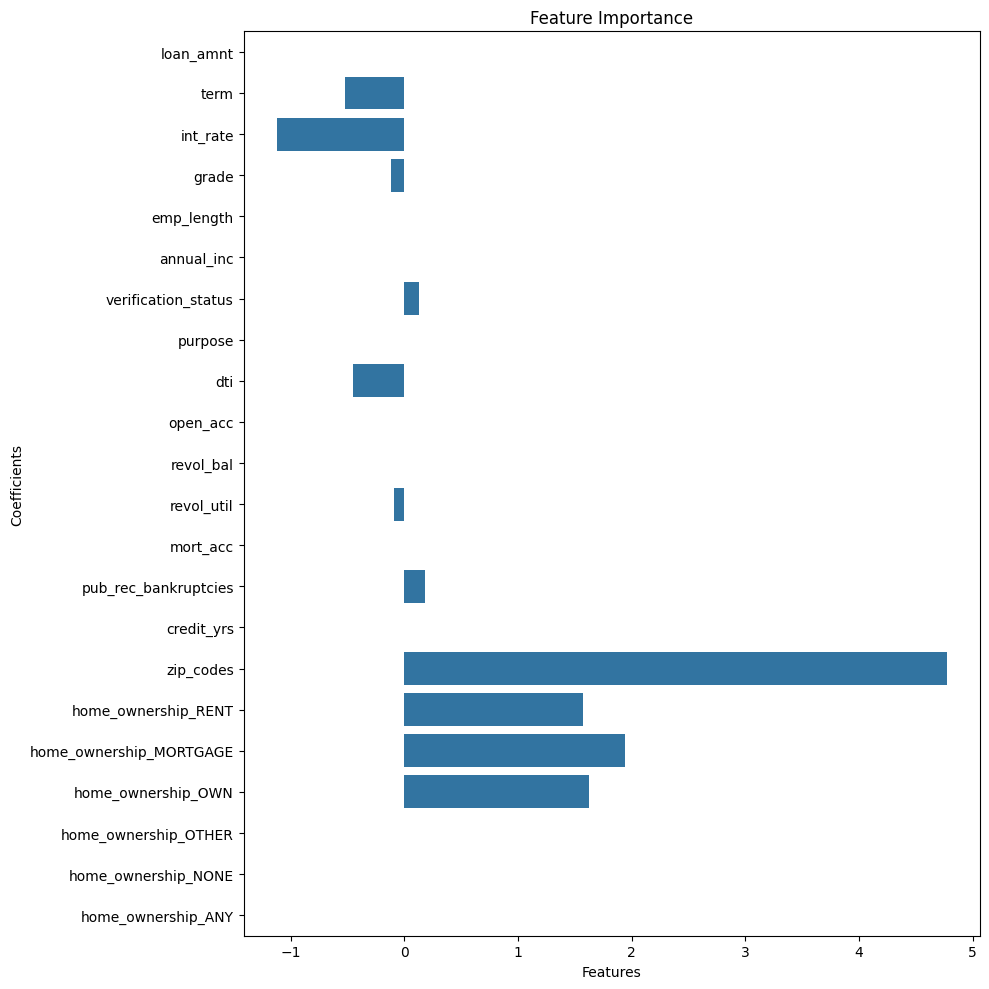

In [ ]:
plt.figure(figsize=(10,10))
sns.barplot(y = feature_imp['Features'], x = feature_imp['Coefficients'])
plt.title("Feature Importance")
plt.xticks(fontsize = 10)
plt.xlabel("Features")
plt.yticks(fontsize = 10)
plt.ylabel("Coefficients")
plt.tight_layout()
plt.show()

In [ ]:
print(classification_report(y_test,yhat_test))

              precision    recall  f1-score   support

           0       0.83      0.52      0.64     15422
           1       0.89      0.97      0.93     63753

    accuracy                           0.88     79175
   macro avg       0.86      0.74      0.78     79175
weighted avg       0.88      0.88      0.87     79175



# **Results Interpretation & Stakeholder Presentation**

###**Model Performance**


* **F1 Score**:
  * Train F1: 0.88, Test F1: 0.93.
  * The F1 indicates strong performance in handling both false positives and false negatives, especially on the test set. This makes the model well-suited for situations where both types of errors are important to minimize.

..
* **Recall**:
  * Train Recall: 0.98, Test Recall: 0.97.
  * The model is good at identifying the positive class (borrowers who are creditworthy). It correctly classifies most of the true positives and minimizes false negatives.

..

* **Precision:**
  * Test Precision: 0.89.
  * The model has high precision on the test set, meaning it's good at detecting True Positives and avoiding False Positives.

..

* **AUC-ROC:**
  * AUC-ROC: 0.889.
  * The model is good at distinguishing between the positive and negative classes, demonstrating good discriminatory power across all thresholds.


..

to add...

* There's a notable drop in accuracy from the training to the test set.However, since accuracy may not be the best measure for this task, the accuracy score is of less importance.

* The precision gap between the training and test data needs to be examined further.



---



---



### **Feature Importance & Coefficient Interpretation**

** Key Features:**

* **Zip Code Locations:** With the highest coefficient of (4.77), Location might be a very influential feature in determining eligibility. Borrowers from certain zip codes are significantly more likely to repay loans or default. This is likely due to regional economic conditions or demographics.

* **Home Ownership:** Home ownership turns up as an important factor in determining creditworthiness. Home ownership, could indicate financial stability and a stronger ability to manage loan repayments, particularly individuals who mortgage.

* **Interest Rate:** Interest rate has a negative coefficient of -1.110258. Higher interest rates are strongly associated with a higher risk of default. This suggests that loans with high interest rates may be given to borrowers who are perceived as riskier, and they are more likely to default.

* **Term**: Loan term has negative coefficient (-0.518348) suggesting borrowers who choose longer loan terms (60 months) more likely to lead default, possibly due to their inability to bear financial burden over time.

* **Debt-Income Ratio**: DTI has a negative coefficient of -0.44 indicating borrowers with higher DTI are more likely to default. This is a critical feature, as it suggests that the greater a borrower's debt relative to their income, the lower their ability to repay the loan.

* **Public Records of Bankruptcies**: Record of bankruptcy has a small positive impact indicating that bankruptcies should have a limited effect on creditworthiness.

* **Grade** : The model relies less on credit grades assigned by LoanTap. The negative coefficient of -0.117 may indicate that lower grades are tied to a higher likelihood of default. However, this needs to be further analysed and processed differently as the plots showed a significant difference in recovery between the grades.

* **Revolving utilization**: Revolving utilization has a small negative correlation which suggets that individuals with higher revolving utilization may be less creditworthy. This makes sense as high utilization indicates a borrower may be close to maxing out their credit.

Features such as annual income, loan amount, open accounts, employment length, and mortgage accounts have zero coefficients. This may indicate that these features were not as predictive or influential after considering other factors like zip codes and interest rates.







---



---



### **Recommendations**

* Zip codes seem to play a significant role in determining creditworthiness. Further analysis of geographical trends can help better predict credit risk and develop region-specific strategies.

* Loans with higher interest rates are highly correlated with defaults.Regular follow ups with high interest borrowers and better support may help reduce defaults.

* Long-term borrowers show higher tendency to default compared to short-term borrowers. Offering shorter-term loans at higher interest rates or reducing interest rates for long term borrowers is surely worth considering. We can further analyse the interest rates of long term borrowers.

* Since DTI is a strong negative predictor, borrowers with higher DTI ratios should be monitored closely or provided with better financial counseling before approving their loans.

Features like annual income, employment length, and loan amount may need further review or re-engineering, as they are currently not significant predictors.


__________ ******************************** _____________